# Clean/Explore Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from datetime import datetime

import wrangle as wr

## Overview CENSUS Data:

In [2]:
# Read in the Census File:
census = pd.read_csv('census_data_overview.csv')

In [157]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   periodicity              2058 non-null   object 
 1   periodicity_label.value  2058 non-null   object 
 2   seasonadj                2058 non-null   object 
 3   seasonadj_label.value    2058 non-null   object 
 4   geo_level                2058 non-null   object 
 5   geo_level_label.value    2058 non-null   object 
 6   geography                2058 non-null   int64  
 7   geography_label.value    2058 non-null   object 
 8   ind_level                2058 non-null   int64  
 9   industry                 2058 non-null   int64  
 10  industry_label.value     2058 non-null   object 
 11  ownercode                2058 non-null   object 
 12  ownercode_label.value    2058 non-null   object 
 13  sex                      2058 non-null   int64  
 14  sex_label.value         

In [3]:
census.head()

,periodicity,periodicity_label.value,seasonadj,seasonadj_label.value,geo_level,geo_level_label.value,geography,geography_label.value,ind_level,industry,...,year,quarter,Emp,Sep,SepBeg,SepBegR,sEmp,sSep,sSepBeg,sSepBegR
0,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,2016,1,20218,4168.0,2552.0,0.124,1,1,1,6
1,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,112,...,2016,1,23871,3397.0,2356.0,0.098,1,1,1,6
2,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,113,...,2016,1,1705,263.0,193.0,0.113,1,1,1,6
3,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,114,...,2016,1,570,93.0,72.0,0.128,1,1,1,6
4,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,115,...,2016,1,11364,4395.0,3235.0,0.304,1,1,1,6


In [4]:
# Dropping unneeded columns:
col_to_drop = ['sEmp', 'sSep', 'sSepBeg', 'sSepBegR', 'periodicity', 'periodicity_label.value',
               'seasonadj', 'seasonadj_label.value', 'geo_level', 'geo_level_label.value', 
               'geography', 'geography_label.value', 'ind_level', 'sex', 'ownercode',
               'ownercode_label.value', 'sex_label.value', 'agegrp_label.value', 'race_label.value',
               'ethnicity_label.value', 'education_label.value', 'firmage_label.value', 'firmsize_label.value',
               'agegrp', 'race', 'ethnicity',  'education', 'firmage', 'firmsize', ]
census_light = census.drop(columns=col_to_drop)
census_light.head()

,industry,industry_label.value,year,quarter,Emp,Sep,SepBeg,SepBegR
0,111,Crop Production,2016,1,20218,4168.0,2552.0,0.124
1,112,Animal Production and Aquaculture,2016,1,23871,3397.0,2356.0,0.098
2,113,Forestry and Logging,2016,1,1705,263.0,193.0,0.113
3,114,"Fishing, Hunting and Trapping",2016,1,570,93.0,72.0,0.128
4,115,Support Activities for Agriculture and Forestry,2016,1,11364,4395.0,3235.0,0.304


In [5]:
# Renaming:
census_light = census_light.rename(columns={'industry_label.value': 'industry_name'})

In [6]:
census_light.head()

,industry,industry_name,year,quarter,Emp,Sep,SepBeg,SepBegR
0,111,Crop Production,2016,1,20218,4168.0,2552.0,0.124
1,112,Animal Production and Aquaculture,2016,1,23871,3397.0,2356.0,0.098
2,113,Forestry and Logging,2016,1,1705,263.0,193.0,0.113
3,114,"Fishing, Hunting and Trapping",2016,1,570,93.0,72.0,0.128
4,115,Support Activities for Agriculture and Forestry,2016,1,11364,4395.0,3235.0,0.304


In [7]:
census_light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   industry       2058 non-null   int64  
 1   industry_name  2058 non-null   object 
 2   year           2058 non-null   int64  
 3   quarter        2058 non-null   int64  
 4   Emp            2058 non-null   int64  
 5   Sep            1959 non-null   float64
 6   SepBeg         1954 non-null   float64
 7   SepBegR        1954 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 128.8+ KB


In [8]:
# Creating a column with the numerical representation for the month of the first quarter:
census_light['first_month_qtr'] = census_light.quarter.apply(lambda x: '1' if x==1 
                                                             else '4' if x==2 
                                                             else '7' if x==3
                                                            else '10')

In [9]:
# Combining the year and month
census_light['quarterly'] = census_light.year.astype('string') + '-' + census_light.first_month_qtr.astype('string')

In [10]:
# Formatting datetime
census_light['date'] = pd.to_datetime(census_light.quarterly)

In [11]:
census_light.head()

,industry,industry_name,year,quarter,Emp,Sep,SepBeg,SepBegR,first_month_qtr,quarterly,date
0,111,Crop Production,2016,1,20218,4168.0,2552.0,0.124,1,2016-1,2016-01-01
1,112,Animal Production and Aquaculture,2016,1,23871,3397.0,2356.0,0.098,1,2016-1,2016-01-01
2,113,Forestry and Logging,2016,1,1705,263.0,193.0,0.113,1,2016-1,2016-01-01
3,114,"Fishing, Hunting and Trapping",2016,1,570,93.0,72.0,0.128,1,2016-1,2016-01-01
4,115,Support Activities for Agriculture and Forestry,2016,1,11364,4395.0,3235.0,0.304,1,2016-1,2016-01-01


In [12]:
# Dropping more columns:
col_to_drop = ['year', 'first_month_qtr', 'quarterly']
census_light = census_light.drop(columns=col_to_drop)

In [13]:
census_light[census_light.industry == 111].head()

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
0,111,Crop Production,1,20218,4168.0,2552.0,0.124,2016-01-01
98,111,Crop Production,2,21118,5316.0,3305.0,0.157,2016-04-01
196,111,Crop Production,3,20928,5505.0,2928.0,0.140,2016-07-01
294,111,Crop Production,4,20970,6804.0,3391.0,0.164,2016-10-01
392,111,Crop Production,1,20535,4354.0,2734.0,0.131,2017-01-01


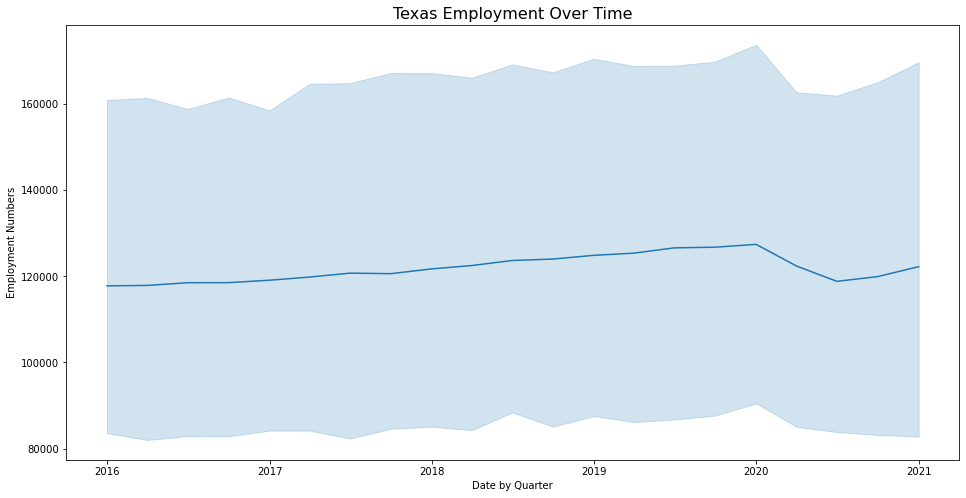

In [14]:
# Time to graph
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="Emp", 
                palette="ch:r=-.2,d=.3_r",
                data=census_light)
plt.title('Texas Employment Over Time', fontsize=16)
plt.xlabel('Date by Quarter')
plt.ylabel('Employment Numbers')
plt.show()

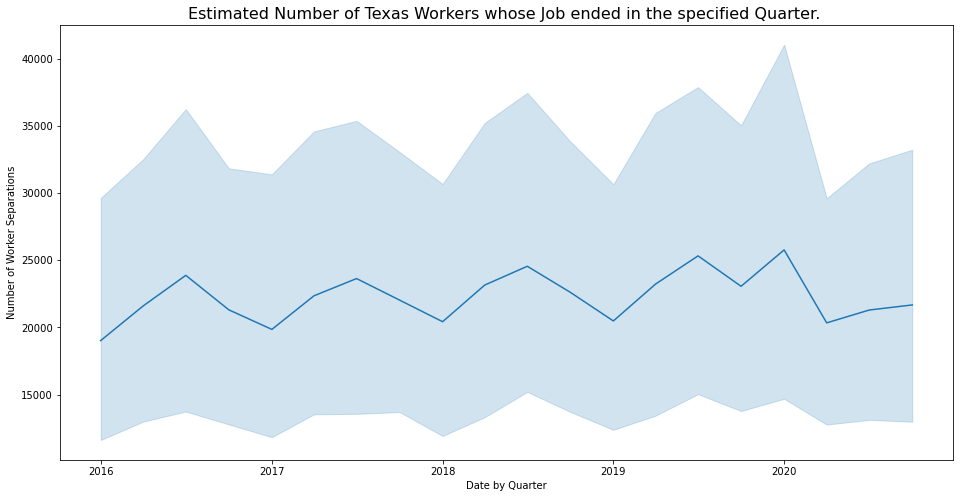

In [15]:
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="Sep",
                palette="ch:r=-.2,d=.3_r",
                data=census_light)
plt.title('Estimated Number of Texas Workers whose Job ended in the specified Quarter. ', fontsize=16)
plt.xlabel('Date by Quarter')
plt.ylabel('Number of Worker Separations')
plt.show()

In [16]:
census_light[census_light.Sep.isnull()].sort_values('date')

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1421,482,Rail Transportation,3,43,NaN,NaN,NaN,2019-07-01
2030,531,Real Estate,1,159501,NaN,NaN,NaN,2021-01-01
2029,525,"Funds, Trusts, and Other Financial Vehicles",1,2072,NaN,NaN,NaN,2021-01-01
2028,524,Insurance Carriers and Related Activities,1,209880,NaN,NaN,NaN,2021-01-01
2027,523,"Securities, Commodity Contracts, and Other Fin...",1,75981,NaN,NaN,NaN,2021-01-01
...,...,...,...,...,...,...,...,...
1987,333,Machinery Manufacturing,1,85943,NaN,NaN,NaN,2021-01-01
1986,332,Fabricated Metal Product Manufacturing,1,112532,NaN,NaN,NaN,2021-01-01
1985,331,Primary Metal Manufacturing,1,19150,NaN,NaN,NaN,2021-01-01
1983,326,Plastics and Rubber Products Manufacturing,1,39077,NaN,NaN,NaN,2021-01-01


In [17]:
sum_by_date = census_light.groupby('date').sum()
sum_by_date

,industry,quarter,Emp,Sep,SepBeg,SepBegR
date,,,,,,
2016-01-01,46866,98,11540642,1863697.0,1328833.0,11.188
2016-04-01,46866,196,11551071,2117030.0,1457851.0,10.506
2016-07-01,46866,294,11612257,2339669.0,1608569.0,11.790
2016-10-01,46866,392,11613729,2088249.0,1361174.0,10.678
2017-01-01,46866,98,11669397,1945426.0,1358990.0,11.104
2017-04-01,46866,196,11740861,2190541.0,1505580.0,10.505
2017-07-01,46866,294,11830147,2316261.0,1601575.0,11.483
2017-10-01,46866,392,11818254,2159209.0,1395959.0,11.415
2018-01-01,46866,98,11926823,2001625.0,1397961.0,10.562


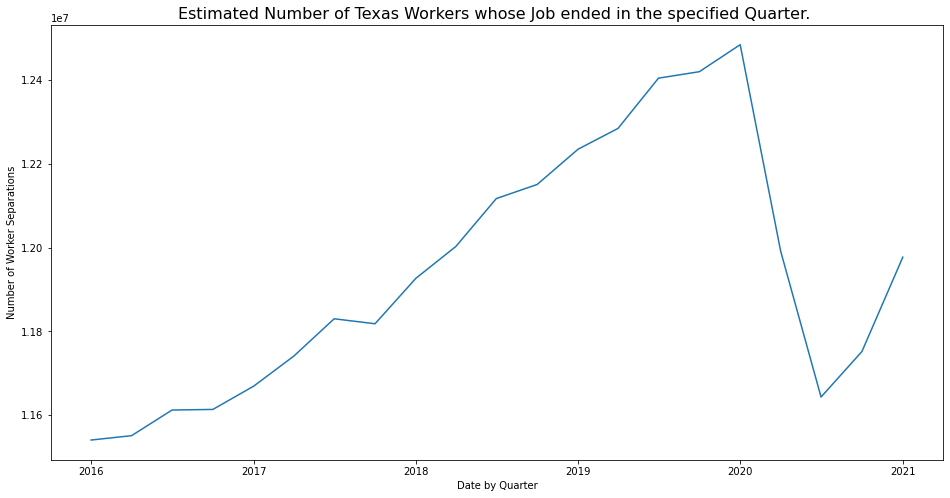

In [18]:
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="Emp",
                palette="ch:r=-.2,d=.3_r",
                data=sum_by_date)
plt.title('Estimated Number of Texas Workers whose Job ended in the specified Quarter. ', fontsize=16)
plt.xlabel('Date by Quarter')
plt.ylabel('Number of Worker Separations')
plt.show()

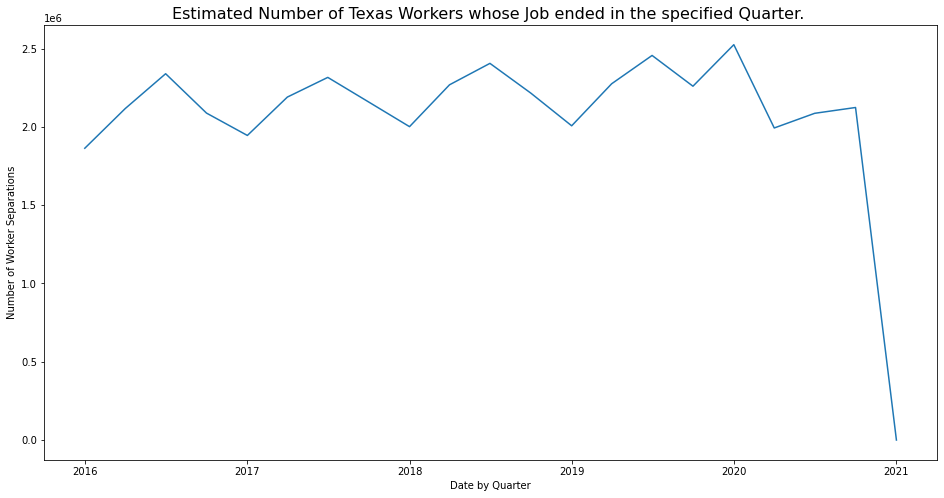

In [19]:
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="Sep",
                palette="ch:r=-.2,d=.3_r",
                data=sum_by_date)
plt.title('Estimated Number of Texas Workers whose Job ended in the specified Quarter. ', fontsize=16)
plt.xlabel('Date by Quarter')
plt.ylabel('Number of Worker Separations')
plt.show()

In [20]:
# Exploring grouping by industry and mean employment 
pd.DataFrame(census_light.groupby('industry_name').Emp.mean())

,Emp
industry_name,
Accommodation,116864.000000
Administration of Economic Programs,12265.380952
Administration of Environmental Quality Programs,10560.380952
"Administration of Housing Programs, Urban Planning, and Community Development",4887.714286
Administration of Human Resource Programs,32261.904762
...,...
Warehousing and Storage,94766.190476
Waste Management and Remediation Services,40790.285714
Water Transportation,4091.380952


In [21]:
census_light[census_light.date == '2020-01-01']

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1568,111,Crop Production,1,18802,4172.0,2529.0,0.133,2020-01-01
1569,112,Animal Production and Aquaculture,1,26304,3609.0,2534.0,0.095,2020-01-01
1570,113,Forestry and Logging,1,1610,300.0,216.0,0.135,2020-01-01
1571,114,"Fishing, Hunting and Trapping",1,626,175.0,119.0,0.202,2020-01-01
1572,115,Support Activities for Agriculture and Forestry,1,10427,3181.0,2299.0,0.228,2020-01-01
...,...,...,...,...,...,...,...,...
1661,923,Administration of Human Resource Programs,1,33284,1744.0,1509.0,0.045,2020-01-01
1662,924,Administration of Environmental Quality Programs,1,10572,405.0,369.0,0.035,2020-01-01
1663,925,"Administration of Housing Programs, Urban Plan...",1,5069,418.0,370.0,0.074,2020-01-01
1664,926,Administration of Economic Programs,1,12619,797.0,668.0,0.053,2020-01-01


In [22]:
census_light[census_light.date == '2020-01-01'].Sep.sum() + census_light[census_light.date == '2020-01-01'].Emp.sum()

15009720.0

In [23]:
pd.DataFrame(census_light.groupby('industry_name').Sep.mean())

,Sep
industry_name,
Accommodation,31978.30
Administration of Economic Programs,737.60
Administration of Environmental Quality Programs,435.80
"Administration of Housing Programs, Urban Planning, and Community Development",300.05
Administration of Human Resource Programs,1812.65
...,...
Warehousing and Storage,20524.70
Waste Management and Remediation Services,6902.35
Water Transportation,481.50


In [24]:
census_light.Sep.isnull().value_counts()

False    1959
True       99
Name: Sep, dtype: int64

In [25]:
census_light.Emp.isnull().value_counts()

False    2058
Name: Emp, dtype: int64

In [26]:
census_light.head()

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
0,111,Crop Production,1,20218,4168.0,2552.0,0.124,2016-01-01
1,112,Animal Production and Aquaculture,1,23871,3397.0,2356.0,0.098,2016-01-01
2,113,Forestry and Logging,1,1705,263.0,193.0,0.113,2016-01-01
3,114,"Fishing, Hunting and Trapping",1,570,93.0,72.0,0.128,2016-01-01
4,115,Support Activities for Agriculture and Forestry,1,11364,4395.0,3235.0,0.304,2016-01-01


In [27]:
census_light[(census_light.date == '2020-04-01') | (census_light.date == '2020-07-01')]

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1666,111,Crop Production,2,19256,4380.0,2912.0,0.153,2020-04-01
1667,112,Animal Production and Aquaculture,2,26834,3521.0,2441.0,0.090,2020-04-01
1668,113,Forestry and Logging,2,1584,267.0,169.0,0.105,2020-04-01
1669,114,"Fishing, Hunting and Trapping",2,551,61.0,38.0,0.068,2020-04-01
1670,115,Support Activities for Agriculture and Forestry,2,9773,3489.0,1685.0,0.170,2020-04-01
...,...,...,...,...,...,...,...,...
1857,923,Administration of Human Resource Programs,3,33165,96.0,0.0,0.000,2020-07-01
1858,924,Administration of Environmental Quality Programs,3,10723,82.0,0.0,0.000,2020-07-01
1859,925,"Administration of Housing Programs, Urban Plan...",3,4910,309.0,247.0,0.050,2020-07-01
1860,926,Administration of Economic Programs,3,12621,1147.0,984.0,0.080,2020-07-01


In [28]:
# Top 10 Job loss by industry for the second quarter of 2020 using Sep:
q2_jobloss = census_light[(census_light.date == '2020-04-01')].sort_values('Sep', ascending=False).head(10)
q2_jobloss

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1752,722,Food Services and Drinking Places,2,933518,281848.0,202677.0,0.220,2020-04-01
1741,561,Administrative and Support Services,2,735737,272692.0,161824.0,0.222,2020-04-01
1743,611,Educational Services,2,1228700,126608.0,114293.0,0.096,2020-04-01
1739,541,"Professional, Scientific, and Technical Services",2,851335,105549.0,85937.0,0.102,2020-04-01
1744,621,Ambulatory Health Care Services,2,757051,101788.0,80030.0,0.106,2020-04-01
1677,238,Specialty Trade Contractors,2,422701,78666.0,58253.0,0.139,2020-04-01
1711,452,General Merchandise Stores,2,278835,55758.0,31373.0,0.110,2020-04-01
1673,213,Support Activities for Mining,2,137409,48171.0,43887.0,0.370,2020-04-01
1746,623,Nursing and Residential Care Facilities,2,202448,47618.0,33655.0,0.169,2020-04-01
1676,237,Heavy and Civil Engineering Construction,2,211164,45306.0,35231.0,0.171,2020-04-01


In [29]:
# Top 10 Job loss by industry for the second quarter of 2020:
q2_jobloss = census_light[(census_light.date == '2020-04-01')].sort_values('Sep', ascending=False).head(10)
q2_jobloss

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1752,722,Food Services and Drinking Places,2,933518,281848.0,202677.0,0.220,2020-04-01
1741,561,Administrative and Support Services,2,735737,272692.0,161824.0,0.222,2020-04-01
1743,611,Educational Services,2,1228700,126608.0,114293.0,0.096,2020-04-01
1739,541,"Professional, Scientific, and Technical Services",2,851335,105549.0,85937.0,0.102,2020-04-01
1744,621,Ambulatory Health Care Services,2,757051,101788.0,80030.0,0.106,2020-04-01
1677,238,Specialty Trade Contractors,2,422701,78666.0,58253.0,0.139,2020-04-01
1711,452,General Merchandise Stores,2,278835,55758.0,31373.0,0.110,2020-04-01
1673,213,Support Activities for Mining,2,137409,48171.0,43887.0,0.370,2020-04-01
1746,623,Nursing and Residential Care Facilities,2,202448,47618.0,33655.0,0.169,2020-04-01
1676,237,Heavy and Civil Engineering Construction,2,211164,45306.0,35231.0,0.171,2020-04-01


In [30]:
# Top 10 Job loss by industry for the third quarter of 2020:
q3_jobloss = census_light[(census_light.date == '2020-07-01')].sort_values('Sep', ascending=False).head(10)
q3_jobloss

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1850,722,Food Services and Drinking Places,3,909632,325072.0,210222.0,0.228,2020-07-01
1839,561,Administrative and Support Services,3,718805,321194.0,158738.0,0.215,2020-07-01
1841,611,Educational Services,3,1141190,131971.0,109424.0,0.095,2020-07-01
1842,621,Ambulatory Health Care Services,3,749271,107268.0,78798.0,0.104,2020-07-01
1837,541,"Professional, Scientific, and Technical Services",3,836229,104449.0,78371.0,0.093,2020-07-01
1775,238,Specialty Trade Contractors,3,415014,81055.0,58352.0,0.141,2020-07-01
1809,452,General Merchandise Stores,3,291653,57824.0,38832.0,0.132,2020-07-01
1804,445,Food and Beverage Stores,3,248841,46608.0,33736.0,0.135,2020-07-01
1845,624,Social Assistance,3,239831,46238.0,34531.0,0.145,2020-07-01
1844,623,Nursing and Residential Care Facilities,3,195422,45982.0,31949.0,0.164,2020-07-01


#### 2020 Q1 minus Q3 Calculations:

In [31]:
# Top 10 Job loss by industry of 2020 using q1 Emp minus q3 Emp:
q1 = census_light[['industry', 'industry_name', 'Emp', 'Sep', 'date']][census_light.date == '2020-01-01']
q3 = census_light[['industry', 'industry_name', 'Emp', 'Sep', 'date']][census_light.date == '2020-07-01']

# match indexes so that I can subtract the quarterly columns
q1.set_index('industry', drop=True, inplace=True)
q3.set_index('industry', drop=True, inplace=True)

# Subtract 2020 q1 - q3 employment:
q1_minus_q3 = q1.Emp - q3.Emp

# Add q3 numbers to the datafram for ease of comparison if needed:
q1['q3_Emp'] = q3.Emp

# Create the difference column:
q1['q1_minus_q3'] = q1_minus_q3

# Rename to q since the dataframe now contains q1 and q3 data:
q = q1

q.head()

,industry_name,Emp,Sep,date,q3_Emp,q1_minus_q3
industry,,,,,,
111,Crop Production,18802,4172.0,2020-01-01,18921,-119
112,Animal Production and Aquaculture,26304,3609.0,2020-01-01,27306,-1002
113,Forestry and Logging,1610,300.0,2020-01-01,1626,-16
114,"Fishing, Hunting and Trapping",626,175.0,2020-01-01,566,60
115,Support Activities for Agriculture and Forestry,10427,3181.0,2020-01-01,10014,413


#### Plots of the difference of 2020 Q1 minus Q3 Employment levels

In [32]:
q = q.sort_values('q1_minus_q3', ascending=False)

In [33]:
q

,industry_name,Emp,Sep,date,q3_Emp,q1_minus_q3
industry,,,,,,
722,Food Services and Drinking Places,1064574,480990.0,2020-01-01,909632,154942
611,Educational Services,1267905,126016.0,2020-01-01,1141190,126715
561,Administrative and Support Services,792704,368256.0,2020-01-01,718805,73899
213,Support Activities for Mining,145908,33349.0,2020-01-01,100222,45686
721,Accommodation,127215,49813.0,2020-01-01,88254,38961
...,...,...,...,...,...,...
524,Insurance Carriers and Related Activities,208168,17171.0,2020-01-01,209722,-1554
522,Credit Intermediation and Related Activities,271404,19771.0,2020-01-01,273082,-1678
445,Food and Beverage Stores,238696,40393.0,2020-01-01,248841,-10145


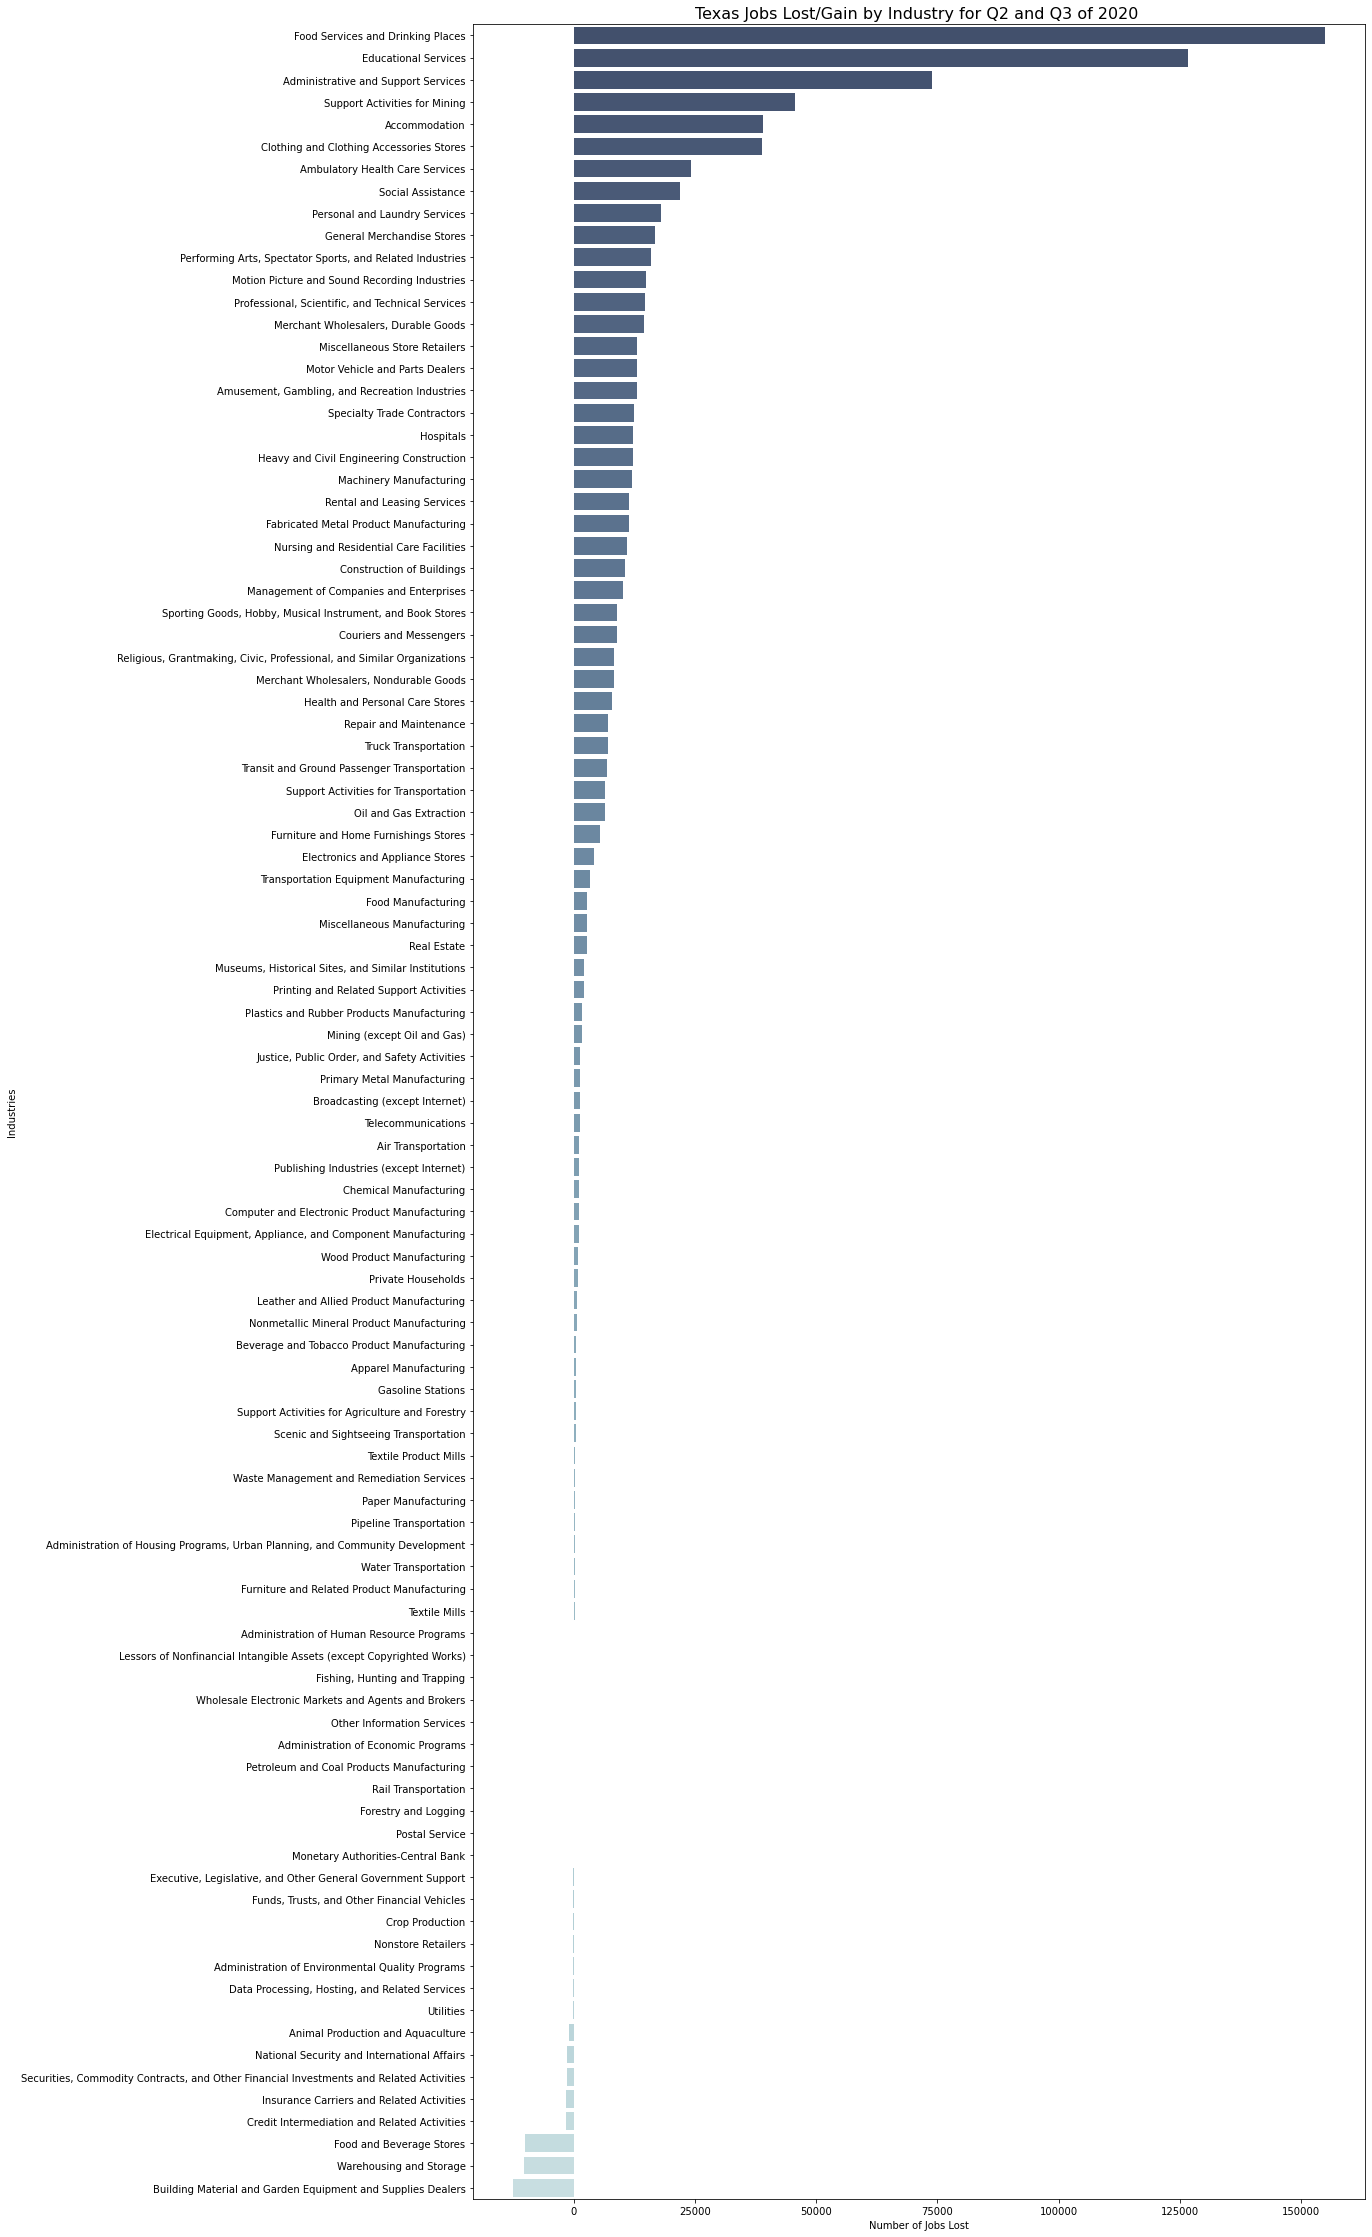

In [34]:
plt.figure(figsize=(16,40))
sns.barplot(x="q1_minus_q3", y="industry_name",
                palette="ch:r=-.2,d=.3_r",
                data=q, alpha=1)
plt.title('Texas Jobs Lost/Gain by Industry for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

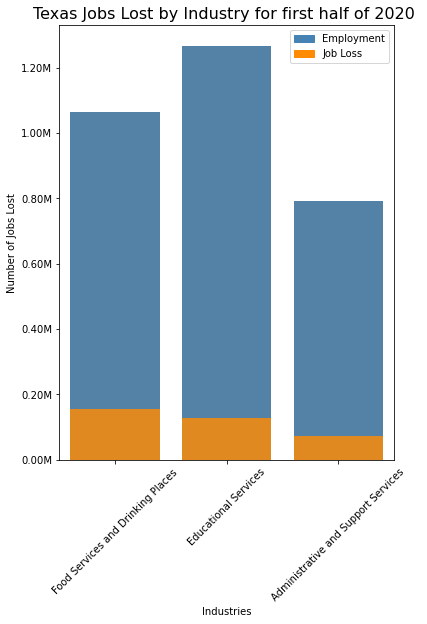

In [35]:
#q = q.sort_values('Emp', ascending=False)

plt.figure(figsize=(6,8))
sns.barplot(x="industry_name", y="Emp",
                color='steelblue',
                #palette="ch:r=-.2,d=.3_r",
                data=q.head(3), alpha=1)
sns.barplot(x="industry_name", y="q1_minus_q3",
                color='darkorange',
                #palette="ch:r=-.4,d=.5_r",
                data=q.head(3), alpha=1)
plt.title('Texas Jobs Lost by Industry for first half of 2020 ', fontsize=16)
plt.xlabel('Industries')
plt.xticks(rotation = 45)
plt.ylabel('Number of Jobs Lost')
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.2f}M'.format(x / 1_000_000))

colors = {'Employment':'steelblue', 'Job Loss':'darkorange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

In [36]:
q.head()

,industry_name,Emp,Sep,date,q3_Emp,q1_minus_q3
industry,,,,,,
722,Food Services and Drinking Places,1064574,480990.0,2020-01-01,909632,154942
611,Educational Services,1267905,126016.0,2020-01-01,1141190,126715
561,Administrative and Support Services,792704,368256.0,2020-01-01,718805,73899
213,Support Activities for Mining,145908,33349.0,2020-01-01,100222,45686
721,Accommodation,127215,49813.0,2020-01-01,88254,38961


In [37]:
q.head(3).q1_minus_q3.sum()

355556

In [38]:
q['job_loss_perc'] = q.q1_minus_q3 / q.Emp

In [39]:
#q['job_loss_perc_sep'] = q.Sep / q.Emp

In [40]:
q.sort_values('job_loss_perc', ascending=False)

,industry_name,Emp,Sep,date,q3_Emp,q1_minus_q3,job_loss_perc
industry,,,,,,,
512,Motion Picture and Sound Recording Industries,28903,18502.0,2020-01-01,14052,14851,0.513822
711,"Performing Arts, Spectator Sports, and Related...",33599,21207.0,2020-01-01,17770,15829,0.471115
487,Scenic and Sightseeing Transportation,1066,543.0,2020-01-01,668,398,0.373358
213,Support Activities for Mining,145908,33349.0,2020-01-01,100222,45686,0.313115
721,Accommodation,127215,49813.0,2020-01-01,88254,38961,0.306261
...,...,...,...,...,...,...,...
525,"Funds, Trusts, and Other Financial Vehicles",1862,550.0,2020-01-01,1973,-111,-0.059613
493,Warehousing and Storage,108596,19590.0,2020-01-01,118858,-10262,-0.094497
482,Rail Transportation,61,3.0,2020-01-01,68,-7,-0.114754


#### Plots using Sep

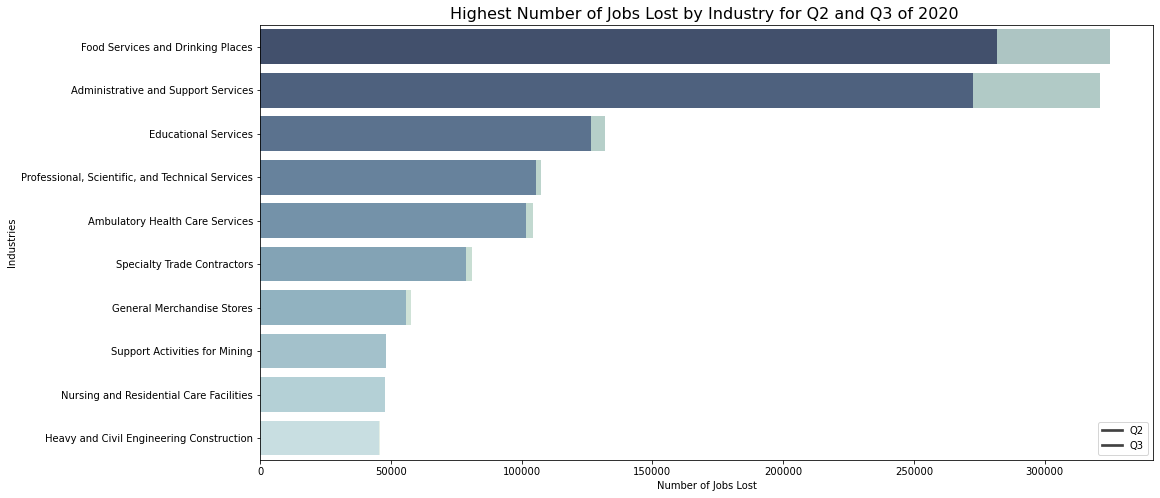

In [41]:
plt.figure(figsize=(16,8))
sns.barplot(x="Sep", y="industry_name",
                palette="ch:r=-.4,d=.5_r",
                data=q3_jobloss, alpha=.5)
sns.barplot(x="Sep", y="industry_name",
                palette="ch:r=-.2,d=.3_r",
                data=q2_jobloss)
plt.title('Highest Number of Jobs Lost by Industry for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.legend(['Q2', 'Q3'])
plt.show()

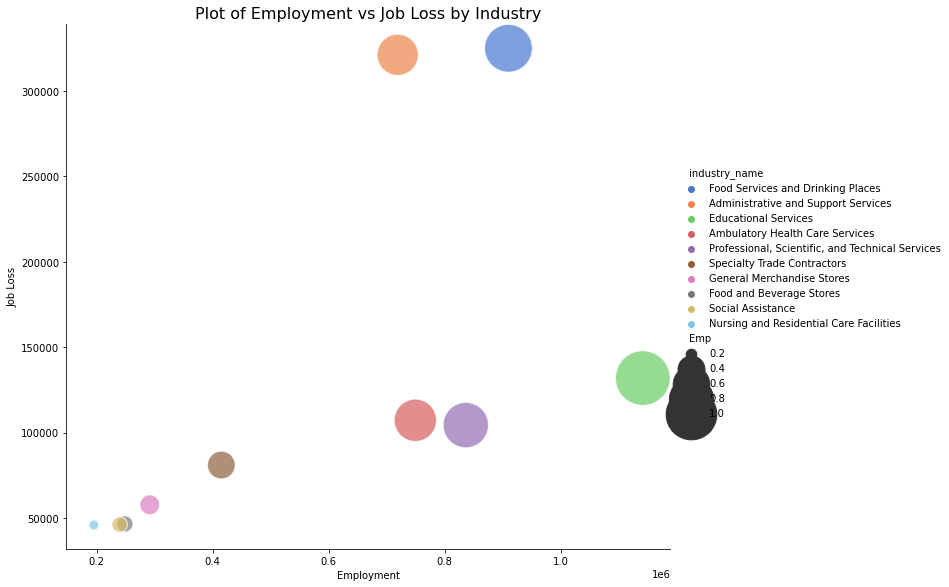

In [42]:
# Plot of Employment vs Job Loss by Industry
sns.relplot(
    data=q3_jobloss,
    x="Emp", y="Sep",
    hue="industry_name", size="Emp",
    palette="muted", alpha=.7,
    sizes=(100, 3000),
    height=8, aspect=1.2
)
plt.title('Plot of Employment vs Job Loss by Industry', fontsize=16)
plt.xlabel('Employment')
plt.ylabel('Job Loss')
plt.show()

In [43]:
census_light['year'] = census_light.date.dt.year

In [44]:
census_light.head()

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date,year
0,111,Crop Production,1,20218,4168.0,2552.0,0.124,2016-01-01,2016
1,112,Animal Production and Aquaculture,1,23871,3397.0,2356.0,0.098,2016-01-01,2016
2,113,Forestry and Logging,1,1705,263.0,193.0,0.113,2016-01-01,2016
3,114,"Fishing, Hunting and Trapping",1,570,93.0,72.0,0.128,2016-01-01,2016
4,115,Support Activities for Agriculture and Forestry,1,11364,4395.0,3235.0,0.304,2016-01-01,2016


In [45]:
census_light = census_light[census_light.year != 2016]

In [46]:
# Function that creates a new dataframe with select indistries 
def select_industries(df, first_industry, list_of_remaining_industries):
    '''This function creates a dataframe out of the census data
    for only the selected industries'''
        # Use one of the industries to initiate the dataframe:
    df_new = df[df.industry == first_industry]
        # Loop through the remaining industries to combine all industries
    for industry in list_of_remaining_industries:
        industry_loss = df[df.industry == industry]
        df_new = pd.concat([df_new, industry_loss], ignore_index=True)

    return df_new

In [47]:
census_lighter = select_industries(census_light, 722, [561, 611])
census_lighter.head()

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date,year
0,722,Food Services and Drinking Places,1,984492,323132.0,207391.0,0.209,2017-01-01,2017
1,722,Food Services and Drinking Places,2,1003344,370415.0,231325.0,0.228,2017-04-01,2017
2,722,Food Services and Drinking Places,3,1026035,392871.0,254298.0,0.250,2017-07-01,2017
3,722,Food Services and Drinking Places,4,1007134,351393.0,218911.0,0.217,2017-10-01,2017
4,722,Food Services and Drinking Places,1,1007203,336070.0,213734.0,0.210,2018-01-01,2018


<AxesSubplot:xlabel='date', ylabel='Sep'>

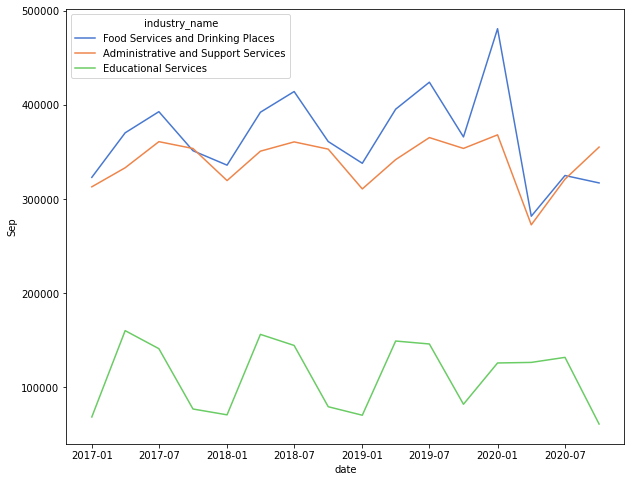

In [48]:
plt.figure(figsize=(10,8))
sns.lineplot(x="date", y="Sep",
            hue="industry_name", palette="muted",
            data=census_lighter)

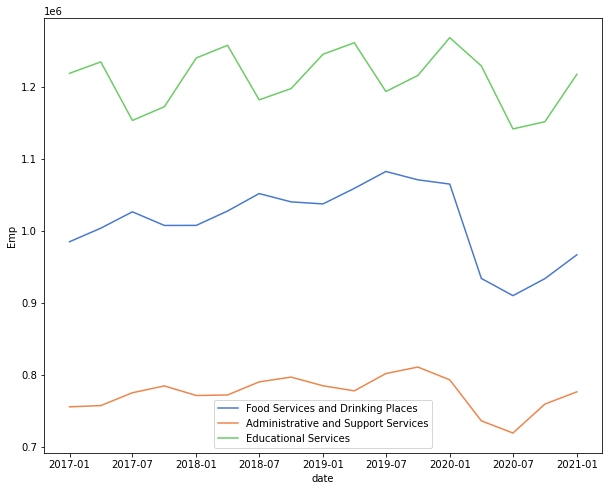

In [49]:
plt.figure(figsize=(10,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="muted",
            data=census_lighter)
plt.legend()
plt.show()

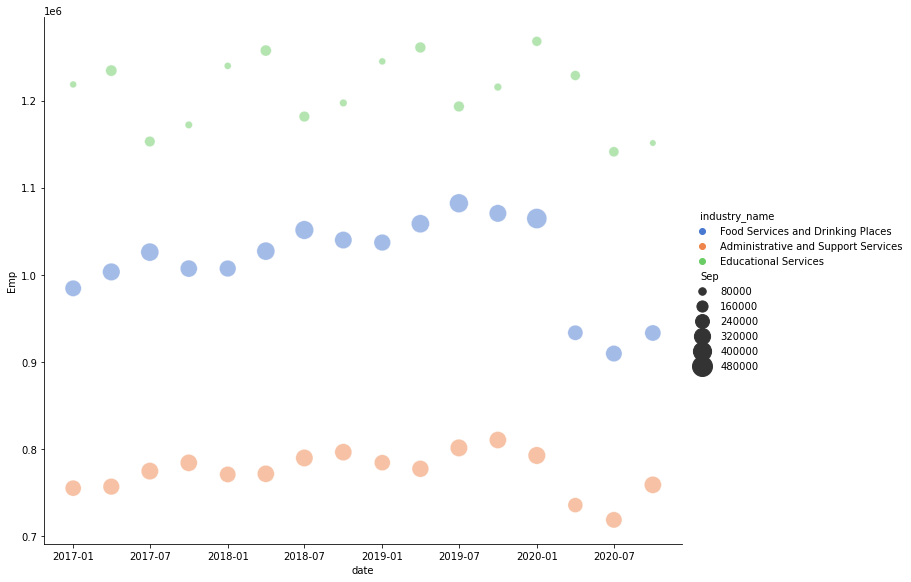

In [50]:
sns.relplot(x="date", y="Emp", hue="industry_name", size="Sep",
            sizes=(40, 400), alpha=.5, palette="muted",
            data=census_lighter,
            height=8, aspect=1.2)
plt.show()

### Industries with highest number of job loss compared to the industry size i.e. Normalized

In [51]:
census_lighter1 = select_industries(census_light, 713, [448, 512])
census_lighter1.head()

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date,year
0,713,"Amusement, Gambling, and Recreation Industries",1,91525,20184.0,14453.0,0.154,2017-01-01,2017
1,713,"Amusement, Gambling, and Recreation Industries",2,96669,26430.0,17203.0,0.162,2017-04-01,2017
2,713,"Amusement, Gambling, and Recreation Industries",3,115554,45490.0,35580.0,0.333,2017-07-01,2017
3,713,"Amusement, Gambling, and Recreation Industries",4,98107,27175.0,19060.0,0.198,2017-10-01,2017
4,713,"Amusement, Gambling, and Recreation Industries",1,94921,21005.0,15211.0,0.156,2018-01-01,2018


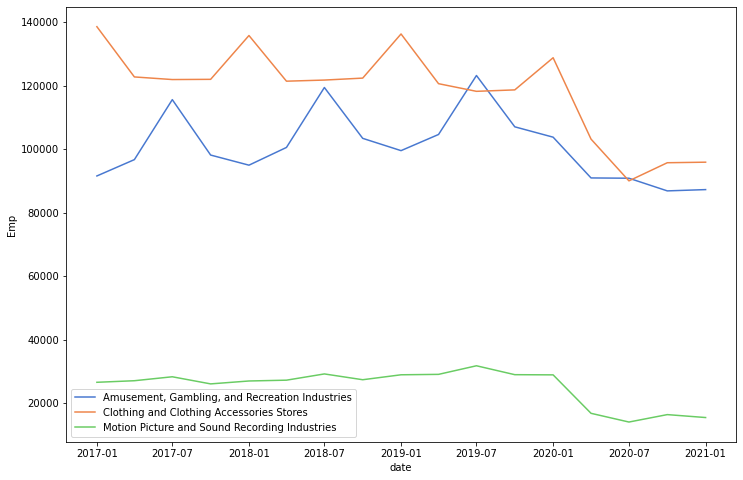

In [52]:
plt.figure(figsize=(12,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="muted",
            data=census_lighter1)
plt.legend()
plt.show()

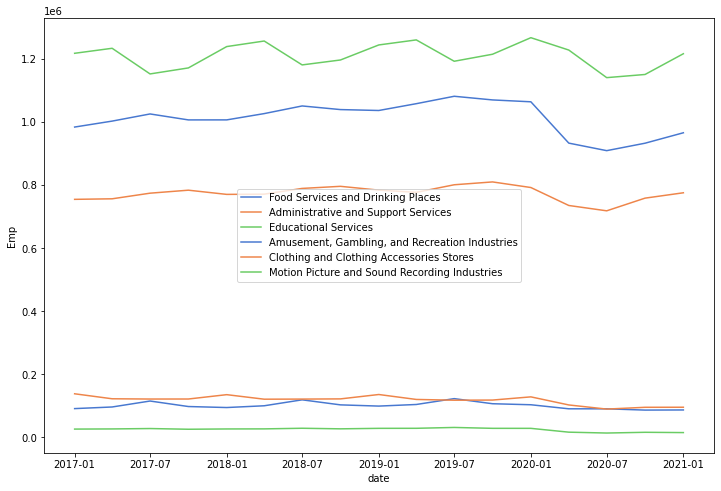

In [53]:
plt.figure(figsize=(12,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="muted",
            data=census_lighter)
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="muted",
            data=census_lighter1)
plt.legend()
plt.show()

## Education Subgroup Data:

In [54]:
ed = pd.read_csv('LaborMarketWEducation.csv')

In [55]:
ed.head()

,periodicity,periodicity_label.value,seasonadj,seasonadj_label.value,geo_level,geo_level_label.value,geography,geography_label.value,ind_level,industry,...,FrmJbLs,EarnBeg,Payroll,sEmp,sHirA,sSep,sFrmJbGn,sFrmJbLs,sEarnBeg,sPayroll
0,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,359.0,2161.0,NaN,1,1,1,1,1,1,5
1,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,242.0,2514.0,NaN,1,1,1,1,1,1,5
2,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,194.0,2770.0,NaN,1,1,1,1,1,1,5
3,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,102.0,3531.0,NaN,1,1,1,1,1,1,5
4,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,193.0,1529.0,NaN,1,1,1,1,1,1,5


In [56]:
def quarterly_dates(df):
    '''Takes in a dataframe with a year and a quarter column 
    and then combines them into a datetime timeseries column'''       
        # Adding a column with month number to represent the begining of a quarter year:
    df['first_month_qtr'] = df.quarter.apply(lambda x: '1' if x==1 
                                                             else '4' if x==2 
                                                             else '7' if x==3
                                                             else '10')
        # Combining month and year into a single column:
    df['quarterly'] = df.year.astype('string') + '-' + df.first_month_qtr.astype('string')
        # Transforming the month/year into datetime format:
    df['date'] = pd.to_datetime(df.quarterly)
        # Dropping the 'first_month_qtr' and 'quarterly' columns:
    col_to_drop = ['first_month_qtr', 'quarterly']
    df = df.drop(columns=col_to_drop)
    return df



def education_census_data():
    '''This function will take in a specific file with QWI education 
    data for the state of Texas. It will then clean the dataframe by 
    removing unneeded columns, and renaming a column in preparation 
    for exploration.'''
        # Read the CSV file:
    census = pd.read_csv('LaborMarketWEducation.csv')
        # List of columns that need to be dropped:
    col_to_drop = ['sEmp', 'sSep', 'periodicity', 'periodicity_label.value',
               'seasonadj', 'seasonadj_label.value', 'geo_level', 'geo_level_label.value', 
               'geography', 'geography_label.value', 'ind_level', 'ownercode', 'HirA',
               'ownercode_label.value', 'agegrp_label.value', 'race_label.value',
               'ethnicity_label.value', 'firmage_label.value', 'firmsize_label.value',
               'agegrp', 'race', 'ethnicity', 'firmage', 'firmsize', 
               'FrmJbGn', 'FrmJbLs', 'EarnBeg', 'Payroll', 'sHirA', 'sFrmJbGn', 'sFrmJbLs', 'sEarnBeg', 'sPayroll']
        # Drop the list of columns:
    census_light = census.drop(columns=col_to_drop)
        # Renaming:
    census_light = census_light.rename(columns={'industry_label.value': 'industry_name'})  
        # Adding quarters (i.e. quarter years) as a datetime format:
    census_light = quarterly_dates(census_light)
    return census_light 

In [57]:
ed = education_census_data()
ed.head()

,industry,industry_name,sex,sex_label.value,education,education_label.value,year,quarter,Emp,Sep,date
0,111,Crop Production,1,Male,E1,Less than high school,2016,1,5650.0,945.0,2016-01-01
1,111,Crop Production,1,Male,E2,"High school or equivalent, no college",2016,1,3355.0,628.0,2016-01-01
2,111,Crop Production,1,Male,E3,Some college or Associate degree,2016,1,2754.0,501.0,2016-01-01
3,111,Crop Production,1,Male,E4,Bachelor's degree or advanced degree,2016,1,1430.0,241.0,2016-01-01
4,111,Crop Production,1,Male,E5,Educational attainment not available (workers ...,2016,1,1449.0,617.0,2016-01-01


In [58]:
# Creating a new dataframe with just the top three industries that lost the most employees
ed_top = select_industries(ed, 722, [561, 611])
ed_top.head(10)

,industry,industry_name,sex,sex_label.value,education,education_label.value,year,quarter,Emp,Sep,date
0,722,Food Services and Drinking Places,1,Male,E1,Less than high school,2016,1,84376.0,23354.0,2016-01-01
1,722,Food Services and Drinking Places,1,Male,E2,"High school or equivalent, no college",2016,1,91152.0,26315.0,2016-01-01
2,722,Food Services and Drinking Places,1,Male,E3,Some college or Associate degree,2016,1,84921.0,23792.0,2016-01-01
3,722,Food Services and Drinking Places,1,Male,E4,Bachelor's degree or advanced degree,2016,1,45131.0,11862.0,2016-01-01
4,722,Food Services and Drinking Places,1,Male,E5,Educational attainment not available (workers ...,2016,1,160753.0,71647.0,2016-01-01
5,722,Food Services and Drinking Places,2,Female,E1,Less than high school,2016,1,89137.0,22505.0,2016-01-01
6,722,Food Services and Drinking Places,2,Female,E2,"High school or equivalent, no college",2016,1,88405.0,23293.0,2016-01-01
7,722,Food Services and Drinking Places,2,Female,E3,Some college or Associate degree,2016,1,83983.0,22441.0,2016-01-01
8,722,Food Services and Drinking Places,2,Female,E4,Bachelor's degree or advanced degree,2016,1,43459.0,11027.0,2016-01-01
9,722,Food Services and Drinking Places,2,Female,E5,Educational attainment not available (workers ...,2016,1,186572.0,78564.0,2016-01-01


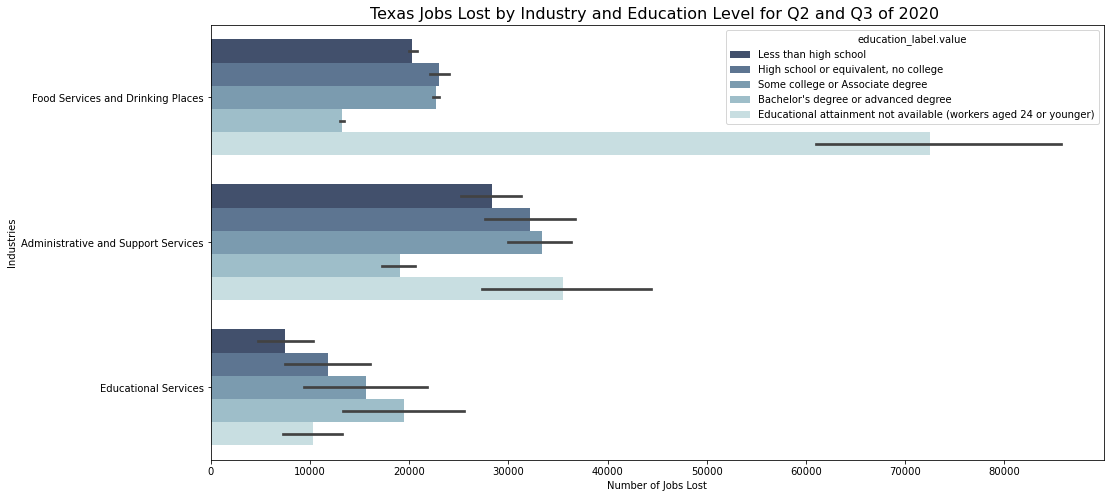

In [59]:
ed_q2q3_sep = ed_top[(ed_top.date == '2020-04-01') | (ed_top.date == '2020-07-01')]

plt.figure(figsize=(16,8))
sns.barplot(x="Sep", y="industry_name",
                hue='education_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=ed_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Education Level for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

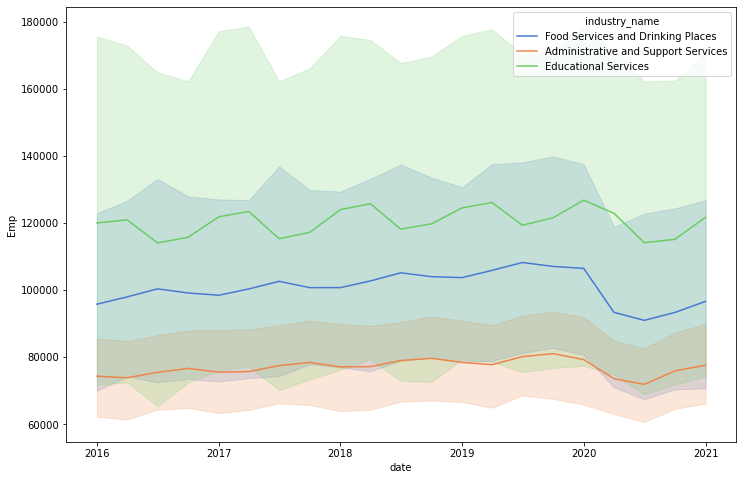

In [60]:
plt.figure(figsize=(12,8))
sns.lineplot(x="date", y="Emp", 
            hue="industry_name", palette="muted",
            data=ed_top)
plt.show()

## Job loss by Male/Female for the Industries that loss the most Jobs

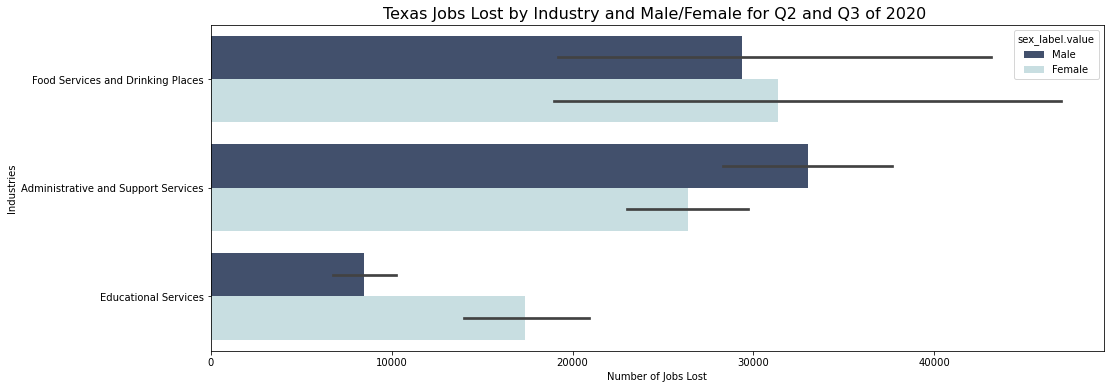

In [61]:
plt.figure(figsize=(16,6))
sns.barplot(x="Sep", y="industry_name",
                hue='sex_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=ed_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Male/Female for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

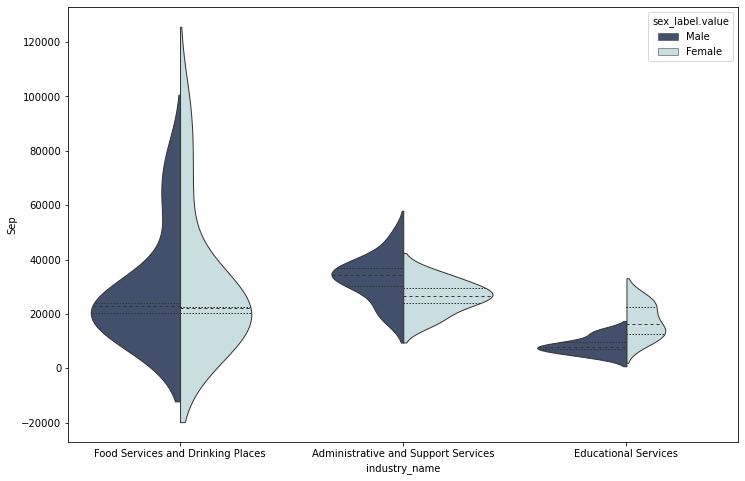

In [62]:
plt.figure(figsize=(12,8))
sns.violinplot(data=ed_q2q3_sep, x="industry_name", y="Sep", hue="sex_label.value",
               split=True, inner="quart", linewidth=1,
               palette='ch:r=-.2,d=.3_r')
plt.show()

## Age Subgroup Data:

In [63]:
def age_census_data():
    '''This function will take in a specific file with QWI education 
    data for the state of Texas. It will then clean the dataframe by 
    removing unneeded columns, and renaming a column in preparation 
    for exploration.'''
        # Read the CSV file:
    census = pd.read_csv('LaborMarketWAge.csv')
        # List of columns that need to be dropped:
    col_to_drop = ['sEmp', 'sSep', 'periodicity', 'periodicity_label.value',
               'seasonadj', 'seasonadj_label.value', 'geo_level', 'geo_level_label.value', 
               'geography', 'geography_label.value', 'ind_level', 'ownercode', 'HirA',
               'ownercode_label.value', 'race_label.value', 'agegrp', 'education', 'education_label.value',
               'ethnicity_label.value', 'firmage_label.value', 'firmsize_label.value',
               'race', 'ethnicity', 'firmage', 'firmsize', 'FrmJbC', 'HirAEndReplR', 'sFrmJbC', 'sHirAEndReplR',
               'FrmJbGn', 'FrmJbLs', 'EarnBeg', 'Payroll', 'sHirA', 'sFrmJbGn', 'sFrmJbLs', 'sEarnBeg', 'sPayroll']
        # Drop the list of columns:
    census_light = census.drop(columns=col_to_drop)
        # Renaming:
    census_light = census_light.rename(columns={'industry_label.value': 'industry_name'})  
        # Adding quarters (i.e. quarter years) as a datetime format:
    census_light = quarterly_dates(census_light)
    return census_light 

In [64]:
age = age_census_data()
age.head()

,industry,industry_name,sex,sex_label.value,agegrp_label.value,year,quarter,Emp,Sep,date
0,111,Crop Production,1,Male,14-18,2016,1,222.0,101.0,2016-01-01
1,111,Crop Production,1,Male,19-21,2016,1,581.0,281.0,2016-01-01
2,111,Crop Production,1,Male,22-24,2016,1,646.0,235.0,2016-01-01
3,111,Crop Production,1,Male,25-34,2016,1,2419.0,590.0,2016-01-01
4,111,Crop Production,1,Male,35-44,2016,1,2511.0,479.0,2016-01-01


In [65]:
# Creating a new dataframe with just the top three industries that lost the most employees
age_top = select_industries(age, 722, [561, 611])
age_top.head(10)

,industry,industry_name,sex,sex_label.value,agegrp_label.value,year,quarter,Emp,Sep,date
0,722,Food Services and Drinking Places,1,Male,14-18,2016,1,52672.0,23942.0,2016-01-01
1,722,Food Services and Drinking Places,1,Male,19-21,2016,1,58480.0,27388.0,2016-01-01
2,722,Food Services and Drinking Places,1,Male,22-24,2016,1,49600.0,20317.0,2016-01-01
3,722,Food Services and Drinking Places,1,Male,25-34,2016,1,115336.0,39618.0,2016-01-01
4,722,Food Services and Drinking Places,1,Male,35-44,2016,1,76034.0,21081.0,2016-01-01
5,722,Food Services and Drinking Places,1,Male,45-54,2016,1,56970.0,12520.0,2016-01-01
6,722,Food Services and Drinking Places,1,Male,55-64,2016,1,34938.0,6866.0,2016-01-01
7,722,Food Services and Drinking Places,1,Male,65-99,2016,1,22302.0,5239.0,2016-01-01
8,722,Food Services and Drinking Places,2,Female,14-18,2016,1,60529.0,26533.0,2016-01-01
9,722,Food Services and Drinking Places,2,Female,19-21,2016,1,70756.0,30867.0,2016-01-01


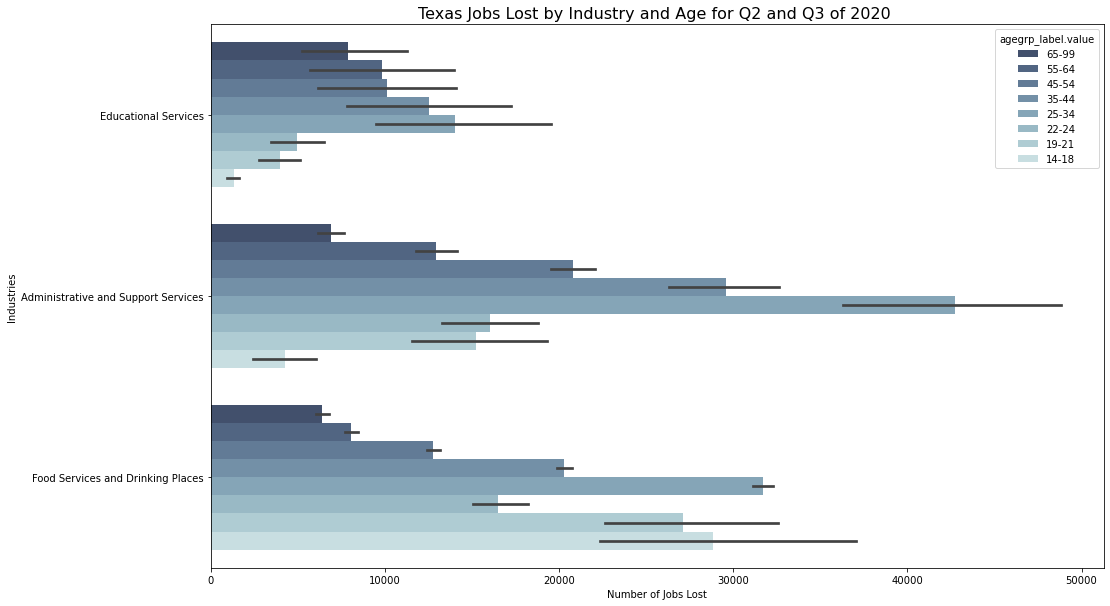

In [66]:
age_q2q3_sep = age_top[(age_top.date == '2020-04-01') | (age_top.date == '2020-07-01')].sort_values('agegrp_label.value', ascending=False)

plt.figure(figsize=(16,10))
sns.barplot(x="Sep", y="industry_name",
                hue='agegrp_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=age_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Age for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

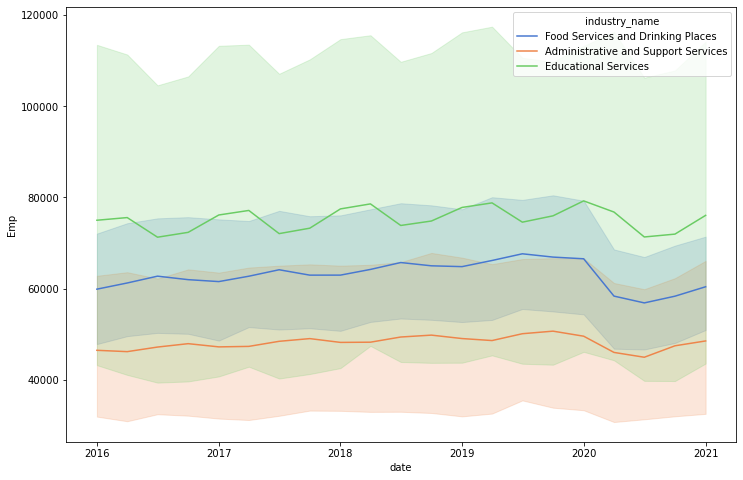

In [67]:
plt.figure(figsize=(12,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="muted",
            data=age_top)
plt.show()

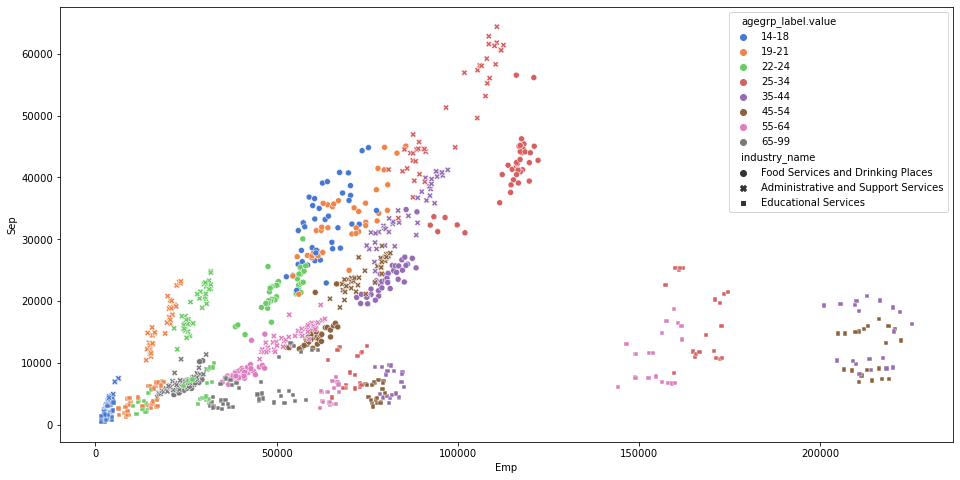

In [68]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="Emp", y="Sep",
                hue="agegrp_label.value",
                style="industry_name",
                palette="muted", sizes=(20, 400),
                data=age_top)
plt.show()

## Race Subgroup Data:

In [69]:
def race_census_data():
    '''This function will take in a specific file with QWI education 
    data for the state of Texas. It will then clean the dataframe by 
    removing unneeded columns, and renaming a column in preparation 
    for exploration.'''
        # Read the CSV file:
    census = pd.read_csv('LaborMarketWRace.csv')
        # List of columns that need to be dropped:
    col_to_drop = ['sEmp', 'sSep', 'periodicity', 'periodicity_label.value',
               'seasonadj', 'seasonadj_label.value', 'geo_level', 'geo_level_label.value', 
               'geography', 'geography_label.value', 'ind_level', 'ownercode', 'HirA',
               'ownercode_label.value', 'agegrp_label.value', 'FrmJbC', 'HirAEndReplR', 
               'firmage_label.value', 'firmsize_label.value', 'sFrmJbC', 'sHirAEndReplR',
               'agegrp', 'firmage', 'firmsize', 'education', 'education_label.value',
               'FrmJbGn', 'FrmJbLs', 'EarnBeg', 'Payroll', 'sHirA', 'sFrmJbGn', 'sFrmJbLs', 'sEarnBeg', 'sPayroll']
        # Drop the list of columns:
    census_light = census.drop(columns=col_to_drop)
        # Renaming:
    census_light = census_light.rename(columns={'industry_label.value': 'industry_name'})  
        # Adding quarters (i.e. quarter years) as a datetime format:
    census_light = quarterly_dates(census_light)
    return census_light 

In [70]:
r = race_census_data()
r.head()

,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date
0,111,Crop Production,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2016,1,8201.0,1514.0,2016-01-01
1,111,Crop Production,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2016,1,9739.0,2048.0,2016-01-01
2,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2016,1,877.0,303.0,2016-01-01
3,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A2,Hispanic or Latino,2016,1,199.0,46.0,2016-01-01
4,111,Crop Production,0,All Sexes,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,2016,1,56.0,14.0,2016-01-01


In [71]:
# dividing separations by employment
r['sep_div_emp'] = r.Sep / r.Emp

In [72]:
# Looking at just q2 2020
r_q2 = r[r.date == '2020-04-01'].sort_values('sep_div_emp', ascending=False).head(30)

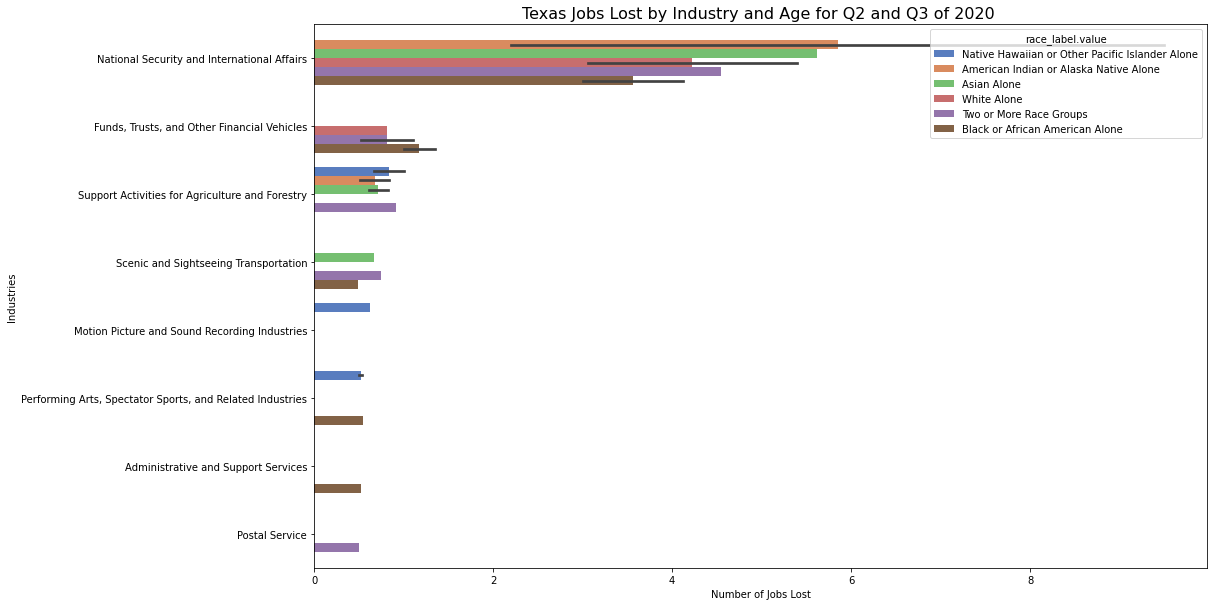

In [73]:
plt.figure(figsize=(16,10))
sns.barplot(x="sep_div_emp", y="industry_name",
                hue='race_label.value',
                palette="muted",
                data=r_q2, alpha=1)
plt.title('Texas Jobs Lost by Industry and Age for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

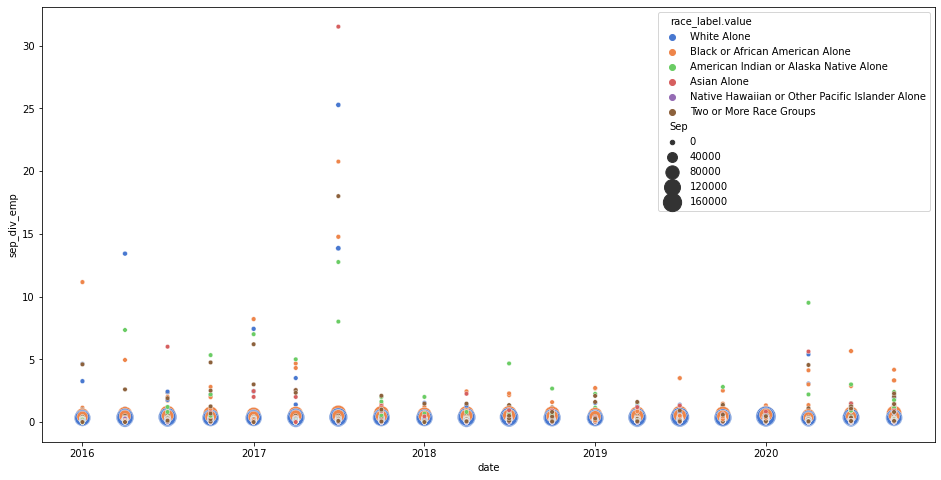

In [74]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="date", y="sep_div_emp",
                hue="race_label.value", size="Sep",
                palette="muted", sizes=(20, 400),
                data=r)
plt.show()

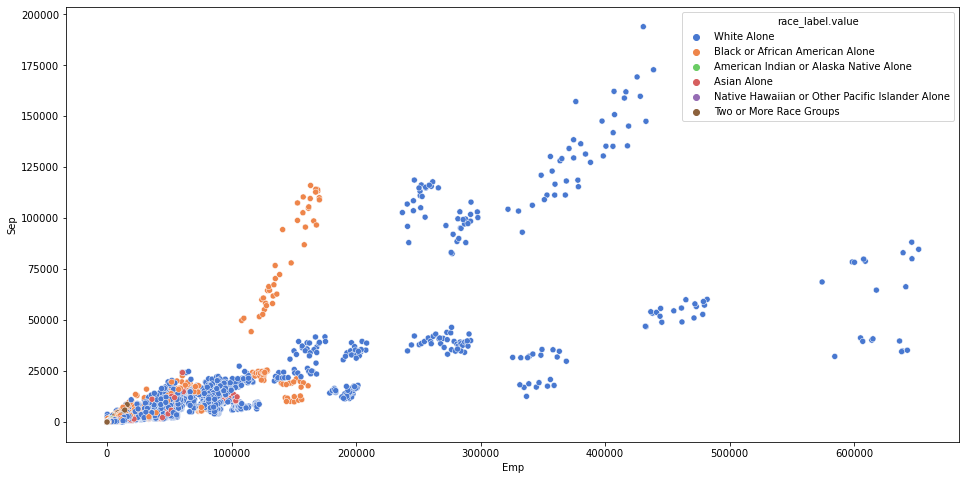

In [75]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="Emp", y="Sep",
                hue="race_label.value", 
                palette="muted", sizes=(20, 400),
                data=r)
plt.show()

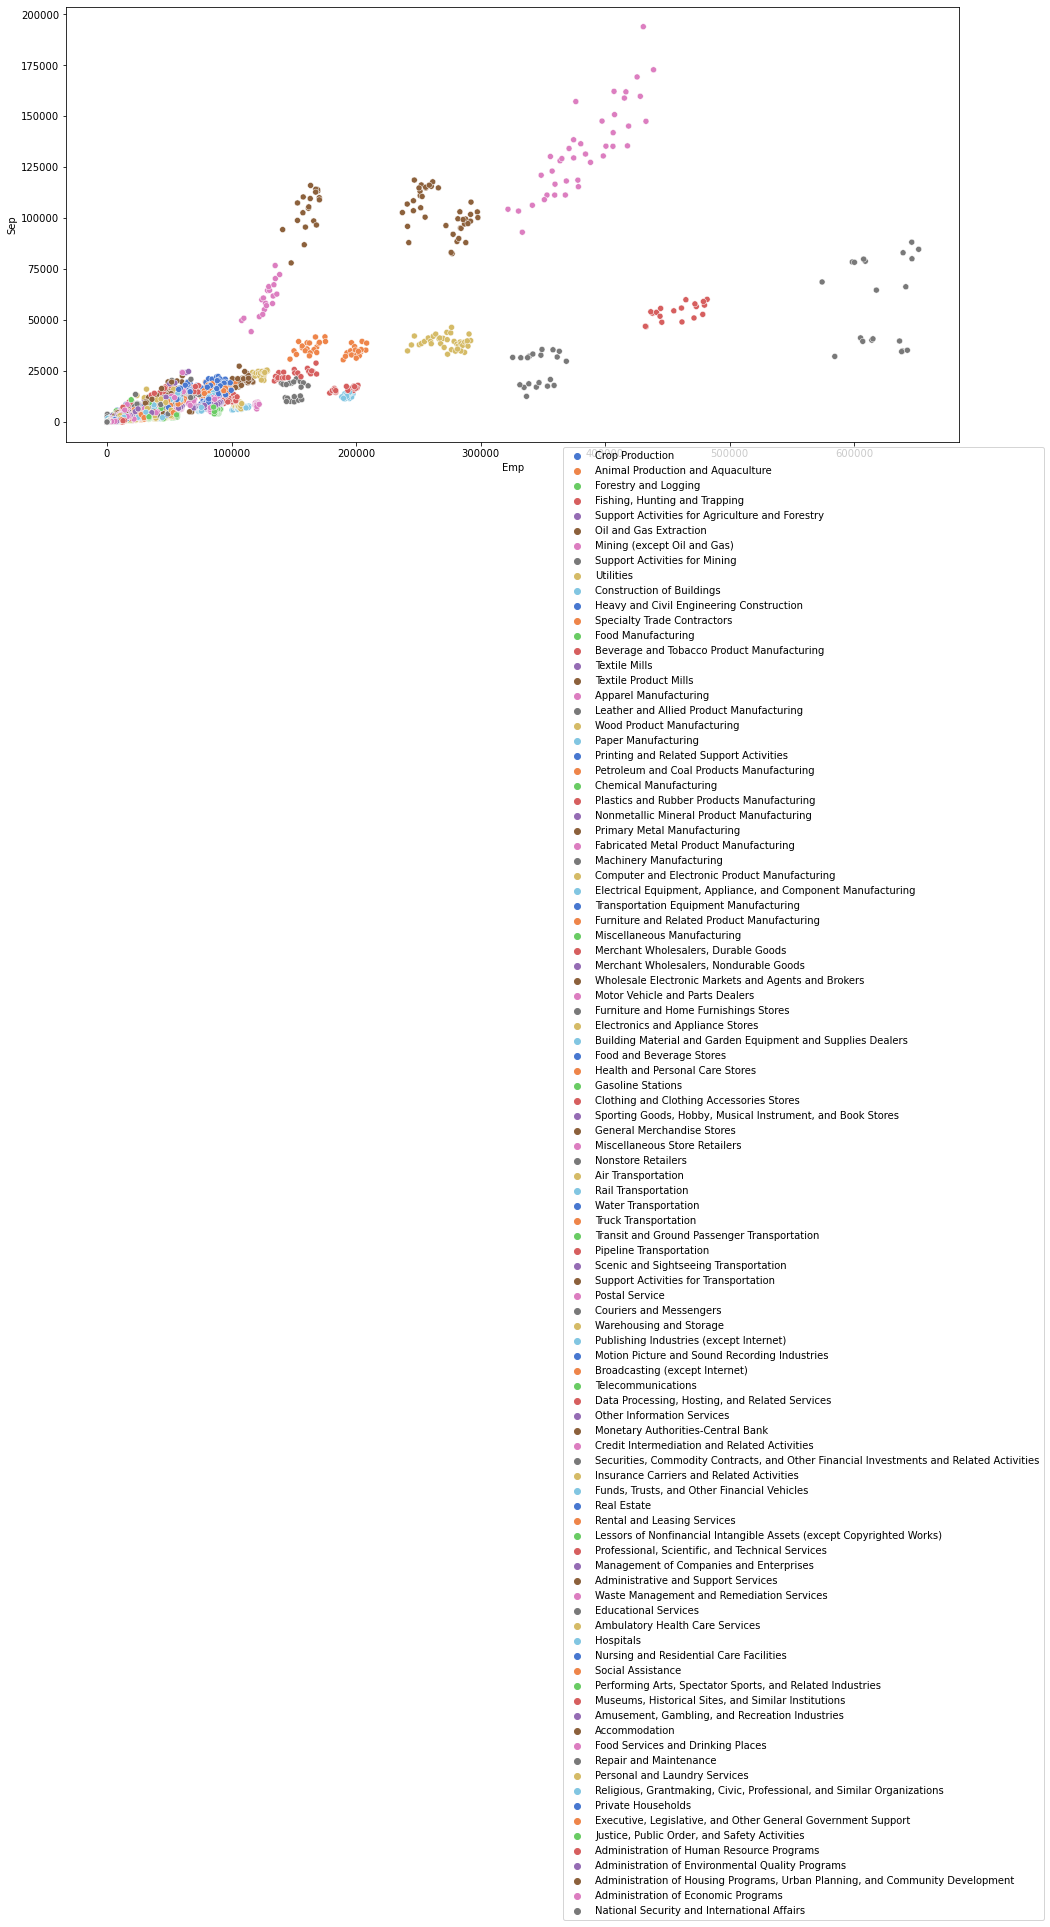

In [76]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="Emp", y="Sep",
                hue="industry_name", 
                palette="muted", sizes=(20, 400),
                data=r)
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 0., 0.0, 0.0))
plt.show()

In [77]:
# Creating a new dataframe with just the top three industries that lost the most employees
r_top = select_industries(r, 722, [561, 611])
r_top.head()

,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date,sep_div_emp
0,722,Food Services and Drinking Places,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2016,1,388271.0,127363.0,2016-01-01,0.328026
1,722,Food Services and Drinking Places,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2016,1,341577.0,106330.0,2016-01-01,0.311291
2,722,Food Services and Drinking Places,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2016,1,122313.0,51690.0,2016-01-01,0.422604
3,722,Food Services and Drinking Places,0,All Sexes,A2,Black or African American Alone,A2,Hispanic or Latino,2016,1,9873.0,3600.0,2016-01-01,0.364631
4,722,Food Services and Drinking Places,0,All Sexes,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,2016,1,3488.0,1361.0,2016-01-01,0.390195


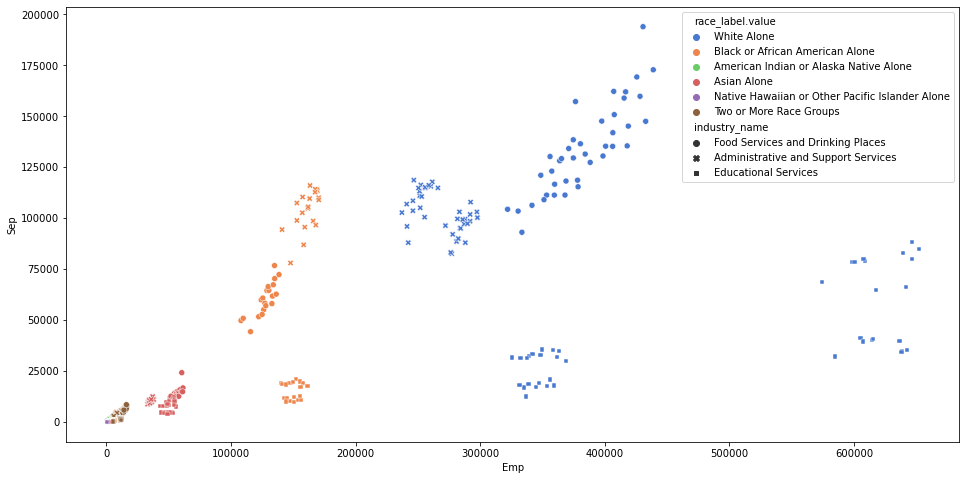

In [78]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="Emp", y="Sep",
                hue="race_label.value", 
                style="industry_name",
                palette="muted", sizes=(20, 400),
                data=r_top)
plt.show()

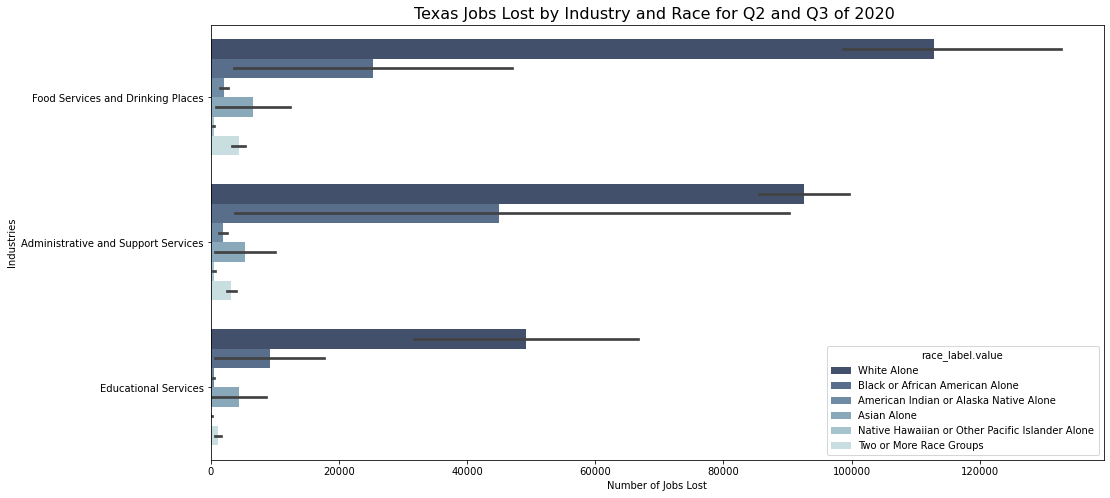

In [79]:
r_q2q3_sep = r_top[(r_top.date == '2020-04-01') | (r_top.date == '2020-07-01')]

plt.figure(figsize=(16,8))
sns.barplot(x="Sep", y="industry_name",
                hue='race_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=r_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Race for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

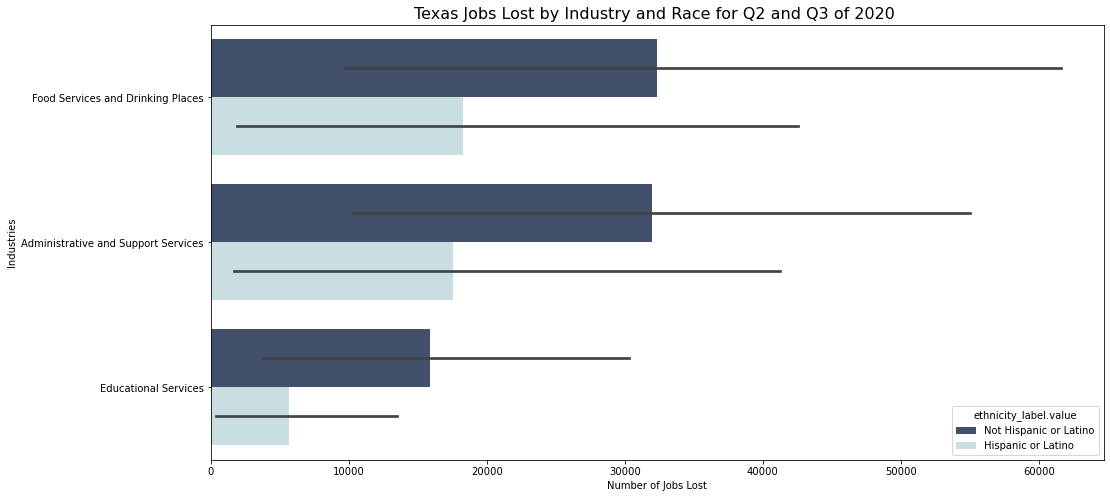

In [80]:
plt.figure(figsize=(16,8))
sns.barplot(x="Sep", y="industry_name",
                hue='ethnicity_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=r_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Race for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

In [81]:
r.head()

,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date,sep_div_emp
0,111,Crop Production,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2016,1,8201.0,1514.0,2016-01-01,0.184612
1,111,Crop Production,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2016,1,9739.0,2048.0,2016-01-01,0.210289
2,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2016,1,877.0,303.0,2016-01-01,0.345496
3,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A2,Hispanic or Latino,2016,1,199.0,46.0,2016-01-01,0.231156
4,111,Crop Production,0,All Sexes,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,2016,1,56.0,14.0,2016-01-01,0.250000


In [82]:
# Top 10 Job loss by industry of 2020 using q1 Emp minus q3 Emp:
r1 = r[r.date == '2020-01-01']
r2 = r[r.date == '2020-04-01']
r3 = r[r.date == '2020-07-01']

# match indexes so that I can subtract the quarterly columns
r1 = r1.reset_index()
r2 = r2.reset_index()
r3 = r3.reset_index()

# Add q3 numbers to the datafram for ease of comparison if needed:
r1['q3_Emp'] = r3.Emp

# Create the difference column of q1 and q3 Emp:
r1['q1_minus_q3'] = r1.Emp - r3.Emp
# Sum q2 Sep and q3 Sep:
r1['q2q3_sep_sum'] = r2.Sep + r3.Sep

# Rename to q since the dataframe now contains q1 and q3 data:
r_compare = r1

r_compare.head(10)

,index,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date,sep_div_emp,q3_Emp,q1_minus_q3,q2q3_sep_sum
0,18816,111,Crop Production,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2020,1,7940.0,1661.0,2020-01-01,0.209194,8329.0,-389.0,3731.0
1,18817,111,Crop Production,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2020,1,8836.0,1973.0,2020-01-01,0.223291,8613.0,223.0,4045.0
2,18818,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2020,1,751.0,244.0,2020-01-01,0.324900,710.0,41.0,475.0
3,18819,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A2,Hispanic or Latino,2020,1,184.0,46.0,2020-01-01,0.250000,167.0,17.0,84.0
4,18820,111,Crop Production,0,All Sexes,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,2020,1,68.0,20.0,2020-01-01,0.294118,65.0,3.0,33.0
5,18821,111,Crop Production,0,All Sexes,A3,American Indian or Alaska Native Alone,A2,Hispanic or Latino,2020,1,232.0,47.0,2020-01-01,0.202586,234.0,-2.0,111.0
6,18822,111,Crop Production,0,All Sexes,A4,Asian Alone,A1,Not Hispanic or Latino,2020,1,427.0,91.0,2020-01-01,0.213115,430.0,-3.0,188.0
7,18823,111,Crop Production,0,All Sexes,A4,Asian Alone,A2,Hispanic or Latino,2020,1,55.0,11.0,2020-01-01,0.200000,55.0,0.0,24.0
8,18824,111,Crop Production,0,All Sexes,A5,Native Hawaiian or Other Pacific Islander Alone,A1,Not Hispanic or Latino,2020,1,28.0,6.0,2020-01-01,0.214286,28.0,0.0,14.0
9,18825,111,Crop Production,0,All Sexes,A5,Native Hawaiian or Other Pacific Islander Alone,A2,Hispanic or Latino,2020,1,30.0,7.0,2020-01-01,0.233333,29.0,1.0,16.0


In [83]:
r1.head(3)

,index,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date,sep_div_emp,q3_Emp,q1_minus_q3,q2q3_sep_sum
0,18816,111,Crop Production,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2020,1,7940.0,1661.0,2020-01-01,0.209194,8329.0,-389.0,3731.0
1,18817,111,Crop Production,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2020,1,8836.0,1973.0,2020-01-01,0.223291,8613.0,223.0,4045.0
2,18818,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2020,1,751.0,244.0,2020-01-01,0.324900,710.0,41.0,475.0


In [84]:
r2.head(3)

,index,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date,sep_div_emp
0,19992,111,Crop Production,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2020,2,8125.0,1757.0,2020-04-01,0.216246
1,19993,111,Crop Production,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2020,2,9084.0,2112.0,2020-04-01,0.232497
2,19994,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2020,2,742.0,216.0,2020-04-01,0.291105


In [85]:
r3.head(3)

,index,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date,sep_div_emp
0,21168,111,Crop Production,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2020,3,8329.0,1974.0,2020-07-01,0.237003
1,21169,111,Crop Production,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2020,3,8613.0,1933.0,2020-07-01,0.224428
2,21170,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2020,3,710.0,259.0,2020-07-01,0.364789


In [86]:
r_compare.sort_values('q1_minus_q3', ascending=False).head()

,index,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date,sep_div_emp,q3_Emp,q1_minus_q3,q2q3_sep_sum
924,19740,611,Educational Services,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2020,1,641494.0,66345.0,2020-01-01,0.103423,574274.0,67220.0,133408.0
1032,19848,722,Food Services and Drinking Places,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2020,1,430677.0,193913.0,2020-01-01,0.450252,374705.0,55972.0,253862.0
1033,19849,722,Food Services and Drinking Places,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2020,1,376488.0,157197.0,2020-01-01,0.417535,322007.0,54481.0,197475.0
925,19741,611,Educational Services,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2020,1,368863.0,29814.0,2020-01-01,0.080827,337746.0,31117.0,63448.0
1034,19850,722,Food Services and Drinking Places,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2020,1,135018.0,76767.0,2020-01-01,0.568569,108127.0,26891.0,94144.0


In [87]:
r_compare['normalized'] = r_compare.q1_minus_q3 / r_compare.Emp

In [88]:
r_plot = r_compare.sort_values('normalized', ascending=False).head(20)
r_plot

,index,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date,sep_div_emp,q3_Emp,q1_minus_q3,q2q3_sep_sum,normalized
729,19545,512,Motion Picture and Sound Recording Industries,0,All Sexes,A5,Native Hawaiian or Other Pacific Islander Alone,A2,Hispanic or Latino,2020,1,26.0,23.0,2020-01-01,0.884615,5.0,21.0,NaN,0.807692
650,19466,487,Scenic and Sightseeing Transportation,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2020,1,112.0,85.0,2020-01-01,0.758929,32.0,80.0,33.0,0.714286
728,19544,512,Motion Picture and Sound Recording Industries,0,All Sexes,A5,Native Hawaiian or Other Pacific Islander Alone,A1,Not Hispanic or Latino,2020,1,42.0,31.0,2020-01-01,0.738095,14.0,28.0,10.0,0.666667
731,19547,512,Motion Picture and Sound Recording Industries,0,All Sexes,A7,Two or More Race Groups,A2,Hispanic or Latino,2020,1,278.0,223.0,2020-01-01,0.802158,99.0,179.0,80.0,0.643885
725,19541,512,Motion Picture and Sound Recording Industries,0,All Sexes,A3,American Indian or Alaska Native Alone,A2,Hispanic or Latino,2020,1,180.0,136.0,2020-01-01,0.755556,65.0,115.0,45.0,0.638889
986,19802,711,"Performing Arts, Spectator Sports, and Related...",0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2020,1,4713.0,3553.0,2020-01-01,0.753872,1736.0,2977.0,2209.0,0.631657
721,19537,512,Motion Picture and Sound Recording Industries,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2020,1,7994.0,5816.0,2020-01-01,0.727546,2954.0,5040.0,2135.0,0.630473
723,19539,512,Motion Picture and Sound Recording Industries,0,All Sexes,A2,Black or African American Alone,A2,Hispanic or Latino,2020,1,234.0,188.0,2020-01-01,0.803419,87.0,147.0,66.0,0.628205
722,19538,512,Motion Picture and Sound Recording Industries,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2020,1,3386.0,2630.0,2020-01-01,0.776728,1282.0,2104.0,1154.0,0.621382
993,19809,711,"Performing Arts, Spectator Sports, and Related...",0,All Sexes,A5,Native Hawaiian or Other Pacific Islander Alone,A2,Hispanic or Latino,2020,1,21.0,19.0,2020-01-01,0.904762,9.0,12.0,10.0,0.571429


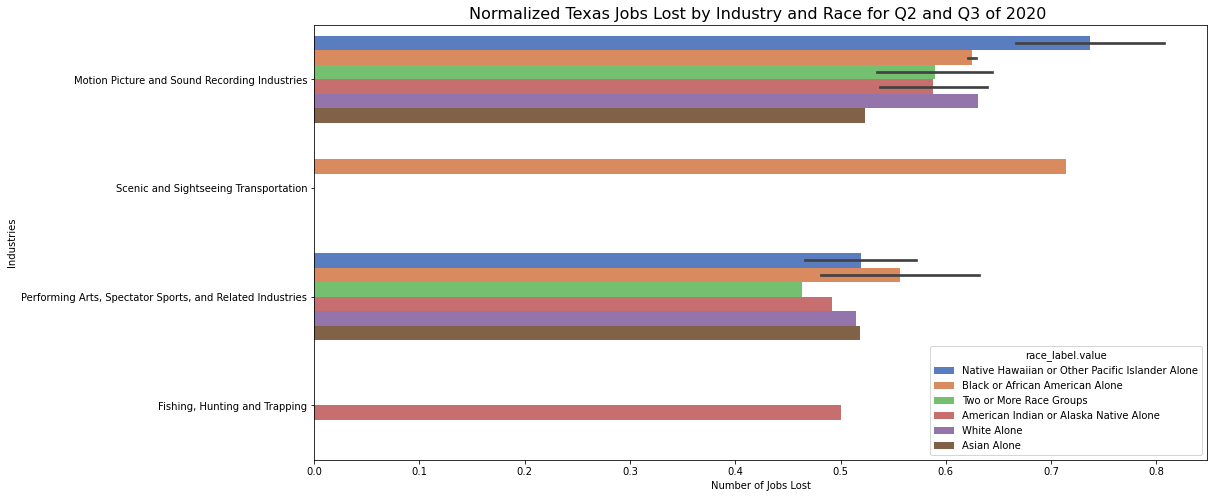

In [89]:
plt.figure(figsize=(16,8))
sns.barplot(x="normalized", y="industry_name",
                hue='race_label.value',
                palette="muted",
                data=r_plot, alpha=1)
plt.title('Normalized Texas Jobs Lost by Industry and Race for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

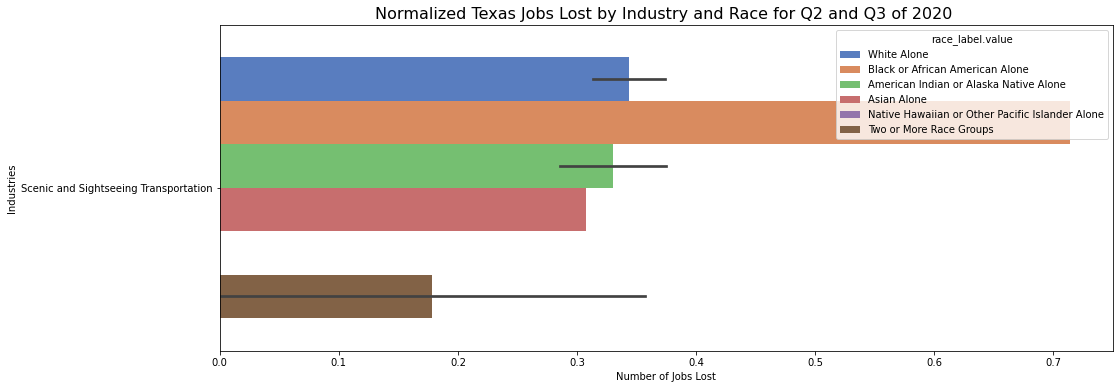

In [90]:
r_plot = r_compare[r_compare.industry == 487]
plt.figure(figsize=(16,6))
sns.barplot(x="normalized", y="industry_name",
                hue='race_label.value',
                palette="muted",
                data=r_plot, alpha=1)
plt.title('Normalized Texas Jobs Lost by Industry and Race for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

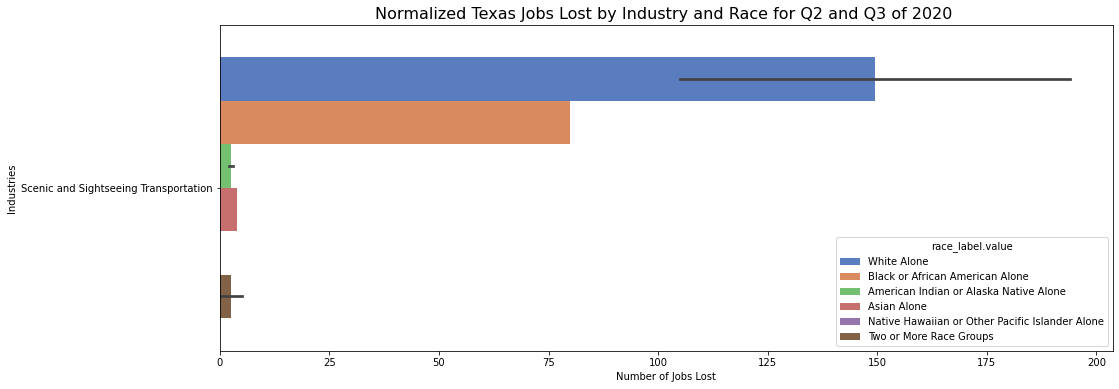

In [91]:
r_plot = r_compare[r_compare.industry == 487]
plt.figure(figsize=(16,6))
sns.barplot(x="q1_minus_q3", y="industry_name",
                hue='race_label.value',
                palette="muted",
                data=r_plot, alpha=1)
plt.title('Normalized Texas Jobs Lost by Industry and Race for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

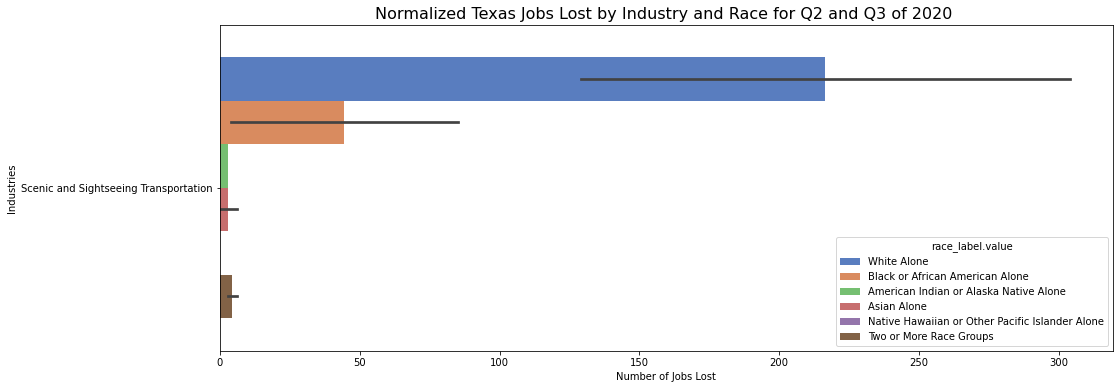

In [92]:
r_plot = r_compare[r_compare.industry == 487]
plt.figure(figsize=(16,6))
sns.barplot(x="Sep", y="industry_name",
                hue='race_label.value',
                palette="muted",
                data=r_plot, alpha=1)
plt.title('Normalized Texas Jobs Lost by Industry and Race for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

In [93]:
r_compare[r_compare.industry == 487]

,index,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date,sep_div_emp,q3_Emp,q1_minus_q3,q2q3_sep_sum,normalized
648,19464,487,Scenic and Sightseeing Transportation,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2020,1,619.0,304.0,2020-01-01,0.491115,425.0,194.0,309.0,0.313409
649,19465,487,Scenic and Sightseeing Transportation,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2020,1,281.0,129.0,2020-01-01,0.459075,176.0,105.0,139.0,0.373665
650,19466,487,Scenic and Sightseeing Transportation,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2020,1,112.0,85.0,2020-01-01,0.758929,32.0,80.0,33.0,0.714286
651,19467,487,Scenic and Sightseeing Transportation,0,All Sexes,A2,Black or African American Alone,A2,Hispanic or Latino,2020,1,3.0,4.0,2020-01-01,1.333333,NaN,NaN,NaN,NaN
652,19468,487,Scenic and Sightseeing Transportation,0,All Sexes,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,2020,1,7.0,3.0,2020-01-01,0.428571,5.0,2.0,NaN,0.285714
653,19469,487,Scenic and Sightseeing Transportation,0,All Sexes,A3,American Indian or Alaska Native Alone,A2,Hispanic or Latino,2020,1,8.0,NaN,2020-01-01,NaN,5.0,3.0,5.0,0.375000
654,19470,487,Scenic and Sightseeing Transportation,0,All Sexes,A4,Asian Alone,A1,Not Hispanic or Latino,2020,1,13.0,6.0,2020-01-01,0.461538,9.0,4.0,NaN,0.307692
655,19471,487,Scenic and Sightseeing Transportation,0,All Sexes,A4,Asian Alone,A2,Hispanic or Latino,2020,1,NaN,0.0,2020-01-01,NaN,NaN,NaN,0.0,NaN
656,19472,487,Scenic and Sightseeing Transportation,0,All Sexes,A5,Native Hawaiian or Other Pacific Islander Alone,A1,Not Hispanic or Latino,2020,1,NaN,NaN,2020-01-01,NaN,0.0,NaN,0.0,NaN
657,19473,487,Scenic and Sightseeing Transportation,0,All Sexes,A5,Native Hawaiian or Other Pacific Islander Alone,A2,Hispanic or Latino,2020,1,NaN,0.0,2020-01-01,NaN,0.0,NaN,NaN,NaN


## Normalized for the Industries that lost the most jobs
Industry codes: 722, 561, 611

### Race/Ethnicity:

In [94]:
# Select only the Industries that lost the most jobs:
r_top = r_compare[(r_compare.industry == 561) | 
         (r_compare.industry == 611) |
         (r_compare.industry == 722)]
r_top_clean = r_top[['industry', 'industry_name', 'race_label.value', 'ethnicity_label.value', 'Emp', 'q3_Emp', 'q1_minus_q3', 'normalized']]

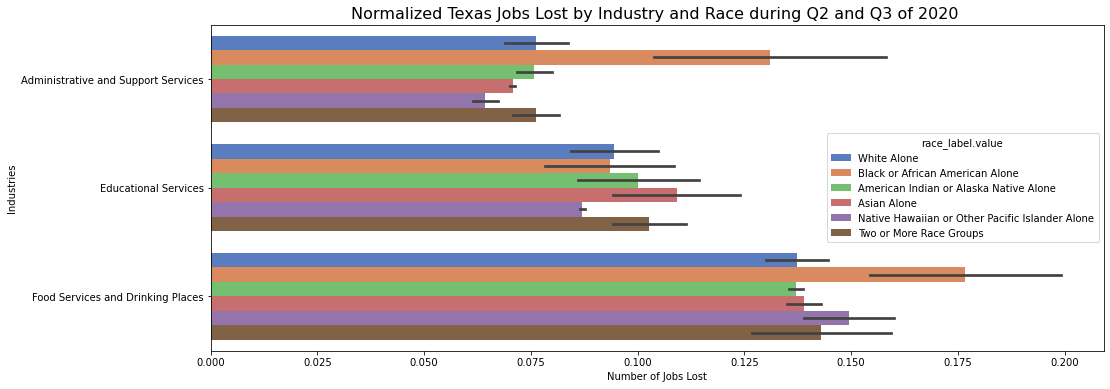

In [95]:
# Plot of the above by race:
plt.figure(figsize=(16,6))
sns.barplot(x="normalized", y="industry_name",
                hue='race_label.value',
                palette="muted",
                data=r_top, alpha=1)
plt.title('Normalized Texas Jobs Lost by Industry and Race during Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

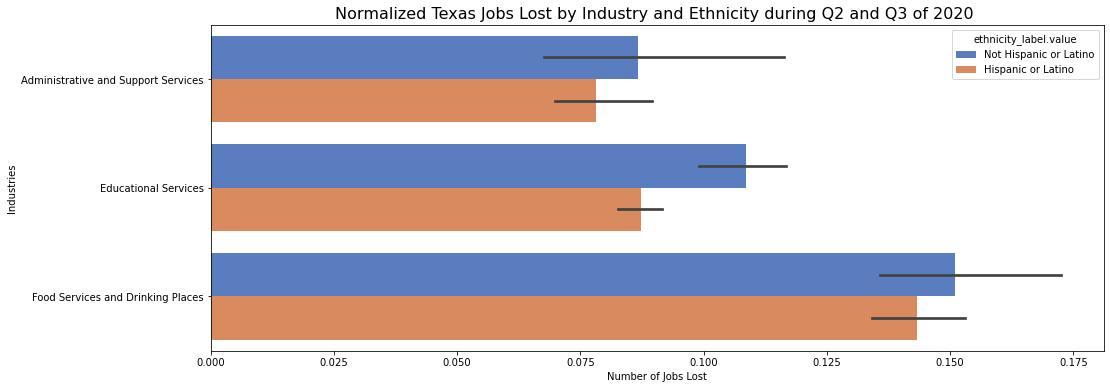

In [96]:
# Plot of the above by ethnicity:
plt.figure(figsize=(16,6))
sns.barplot(x="normalized", y="industry_name",
                hue='ethnicity_label.value',
                palette="muted",
                data=r_top, alpha=1)
plt.title('Normalized Texas Jobs Lost by Industry and Ethnicity during Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

### Education:

In [97]:
# Keeping only q1 and q3 of 2020:
ed1 = ed[ed.date == '2020-01-01']
ed3 = ed[ed.date == '2020-07-01']

# match indexes so that I can subtract the quarterly columns
ed1 = ed1.reset_index()
ed3 = ed3.reset_index()

# Add q3 numbers to the datafram for ease of comparison if needed:
ed1['q3_Emp'] = ed3.Emp

# Create the difference column of q1 and q3 Emp:
ed1['q1_minus_q3'] = ed1.Emp - ed3.Emp

# Rename to q since the dataframe now contains q1 and q3 data:
ed_compare = ed1

# Normalized job loss:
ed_compare['normalized'] = ed_compare.q1_minus_q3 / ed_compare.Emp

ed_compare.head(1)

,index,industry,industry_name,sex,sex_label.value,education,education_label.value,year,quarter,Emp,Sep,date,q3_Emp,q1_minus_q3,normalized
0,15680,111,Crop Production,1,Male,E1,Less than high school,2020,1,4928.0,788.0,2020-01-01,4855.0,73.0,0.014813


In [98]:
# Select only the Industries that lost the most jobs:
ed_top = ed_compare[(ed_compare.industry == 561) | 
         (ed_compare.industry == 611) |
         (ed_compare.industry == 722)]
ed_top_clean = ed_top[['industry', 'industry_name', 'sex_label.value', 'education_label.value', 'Emp', 'q3_Emp', 'q1_minus_q3', 'normalized']]

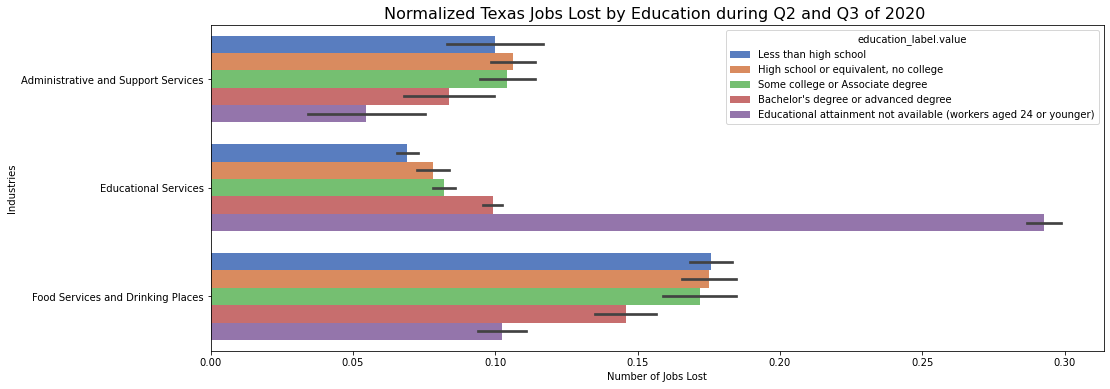

In [99]:
# Plot of the above by ethnicity:
plt.figure(figsize=(16,6))
sns.barplot(x="normalized", y="industry_name",
                hue='education_label.value',
                palette="muted",
                data=ed_top_clean, alpha=1)
plt.title('Normalized Texas Jobs Lost by Education during Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

### Age:

In [100]:
age.head(1)

,industry,industry_name,sex,sex_label.value,agegrp_label.value,year,quarter,Emp,Sep,date
0,111,Crop Production,1,Male,14-18,2016,1,222.0,101.0,2016-01-01


In [101]:
# Keeping only q1 and q3 of 2020:
age1 = age[age.date == '2020-01-01']
age3 = age[age.date == '2020-07-01']

# match indexes so that I can subtract the quarterly columns
age1 = age1.reset_index()
age3 = age3.reset_index()

# Add q3 numbers to the datafram for ease of comparison if neageage:
age1['q3_Emp'] = age3.Emp

# Create the difference column of q1 and q3 Emp:
age1['q1_minus_q3'] = age1.Emp - age3.Emp

# Rename to q since the dataframe now contains q1 and q3 data:
age_compare = age1

# Normalizage job loss:
age_compare['normalized'] = age_compare.q1_minus_q3 / age_compare.Emp

age_compare.head(1)

,index,industry,industry_name,sex,sex_label.value,agegrp_label.value,year,quarter,Emp,Sep,date,q3_Emp,q1_minus_q3,normalized
0,25088,111,Crop Production,1,Male,14-18,2020,1,290.0,139.0,2020-01-01,484.0,-194.0,-0.668966


In [102]:
# Select only the Industries that lost the most jobs:
age_top = age_compare[(age_compare.industry == 561) | 
         (age_compare.industry == 611) |
         (age_compare.industry == 722)]
age_top_clean = age_top[['industry', 'industry_name', 'sex_label.value', 'agegrp_label.value', 'Emp', 'q3_Emp', 'q1_minus_q3', 'normalized']]


In [103]:
age_top_clean

,industry,industry_name,sex_label.value,agegrp_label.value,Emp,q3_Emp,q1_minus_q3,normalized
1200,561,Administrative and Support Services,Male,14-18,3598.0,5352.0,-1754.0,-0.487493
1201,561,Administrative and Support Services,Male,19-21,20981.0,19919.0,1062.0,0.050617
1202,561,Administrative and Support Services,Male,22-24,28738.0,26225.0,2513.0,0.087445
1203,561,Administrative and Support Services,Male,25-34,106538.0,96740.0,9798.0,0.091967
1204,561,Administrative and Support Services,Male,35-44,94032.0,86345.0,7687.0,0.081749
1205,561,Administrative and Support Services,Male,45-54,79055.0,72421.0,6634.0,0.083916
1206,561,Administrative and Support Services,Male,55-64,62157.0,57056.0,5101.0,0.082066
1207,561,Administrative and Support Services,Male,65-99,30544.0,27132.0,3412.0,0.111708
1208,561,Administrative and Support Services,Female,14-18,2856.0,3737.0,-881.0,-0.308473
1209,561,Administrative and Support Services,Female,19-21,15752.0,14414.0,1338.0,0.084942


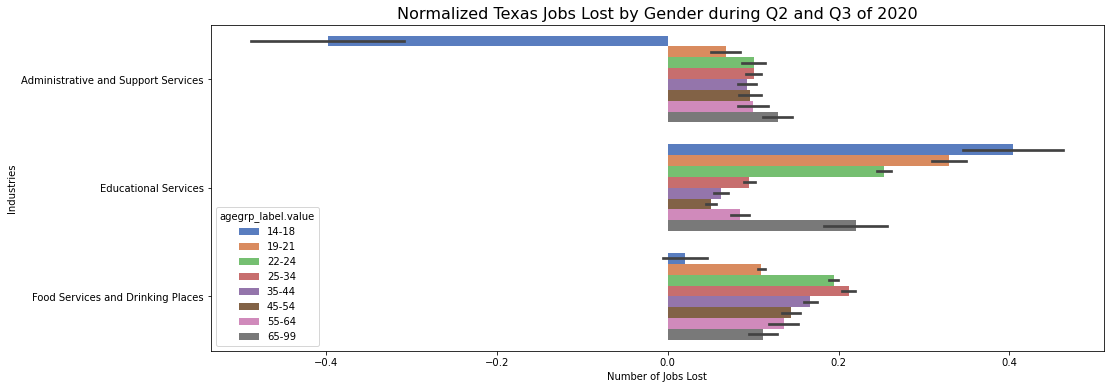

In [104]:
# Plot of the above by ethnicity:
plt.figure(figsize=(16,6))
sns.barplot(x="normalized", y="industry_name",
                hue='agegrp_label.value',
                palette="muted",
                data=age_top_clean, alpha=1)
plt.title('Normalized Texas Jobs Lost by Gender during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

### Gender

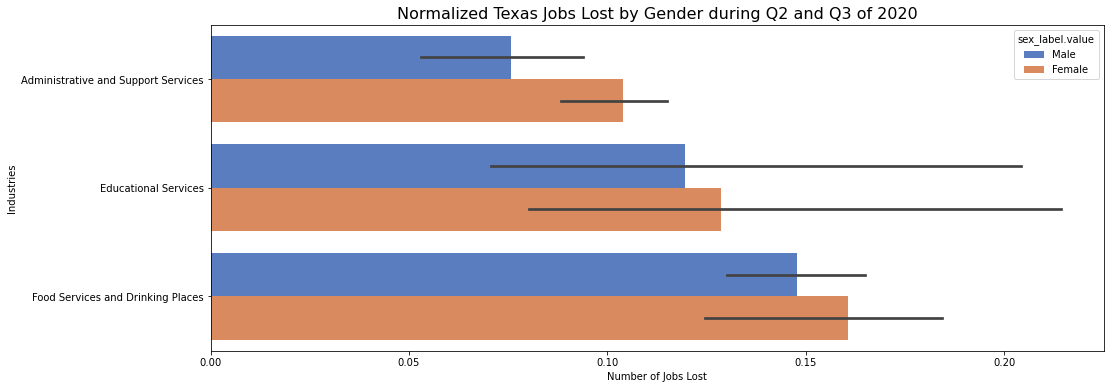

In [105]:
# Plot of the above by ethnicity:
plt.figure(figsize=(16,6))
sns.barplot(x="normalized", y="industry_name",
                hue='sex_label.value',
                palette="muted",
                data=ed_top_clean, alpha=1)
plt.title('Normalized Texas Jobs Lost by Gender during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

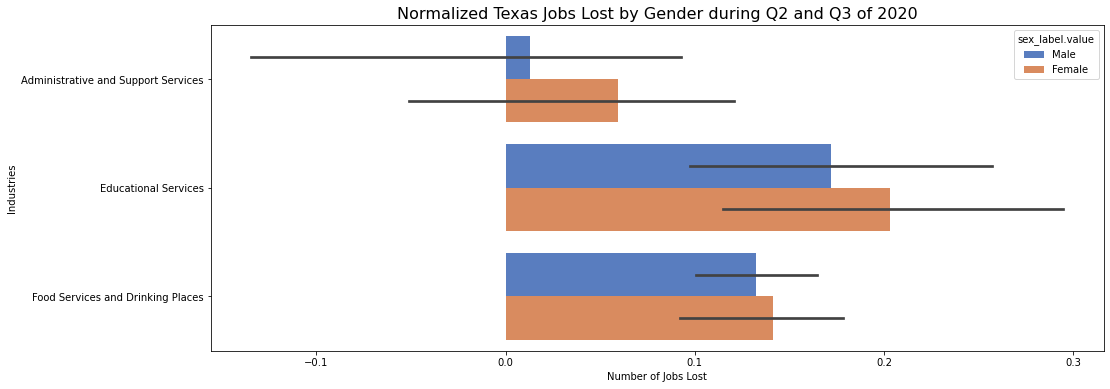

In [106]:
# Plot of the above by ethnicity:
plt.figure(figsize=(16,6))
sns.barplot(x="normalized", y="industry_name",
                hue='sex_label.value',
                palette="muted",
                data=age_top_clean, alpha=1)
plt.title('Normalized Texas Jobs Lost by Gender during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

#### Print to CSV

In [107]:
r_top_clean.to_csv('norm_job_loss_race_ethnicity.csv')
ed_top_clean.to_csv('norm_job_loss_education_gender.csv')
age_top_clean.to_csv('norm_job_loss_age_gender.csv')

## Overall by subcategory

### Race

In [108]:
r_compare.head()

,index,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date,sep_div_emp,q3_Emp,q1_minus_q3,q2q3_sep_sum,normalized
0,18816,111,Crop Production,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2020,1,7940.0,1661.0,2020-01-01,0.209194,8329.0,-389.0,3731.0,-0.048992
1,18817,111,Crop Production,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2020,1,8836.0,1973.0,2020-01-01,0.223291,8613.0,223.0,4045.0,0.025238
2,18818,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2020,1,751.0,244.0,2020-01-01,0.324900,710.0,41.0,475.0,0.054594
3,18819,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A2,Hispanic or Latino,2020,1,184.0,46.0,2020-01-01,0.250000,167.0,17.0,84.0,0.092391
4,18820,111,Crop Production,0,All Sexes,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,2020,1,68.0,20.0,2020-01-01,0.294118,65.0,3.0,33.0,0.044118


In [109]:
r_comp = r_compare[['race_label.value', 'Emp', 'q1_minus_q3']].groupby('race_label.value').sum()
r_comp['norm'] = r_comp.q1_minus_q3 / r_comp.Emp 
r_comp

,Emp,q1_minus_q3,norm
race_label.value,,,
American Indian or Alaska Native Alone,127501.0,9097.0,0.071348
Asian Alone,730103.0,26399.0,0.036158
Black or African American Alone,1787827.0,172681.0,0.096587
Native Hawaiian or Other Pacific Islander Alone,28867.0,1876.0,0.064988
Two or More Race Groups,218290.0,14747.0,0.067557
White Alone,9591949.0,616481.0,0.064271


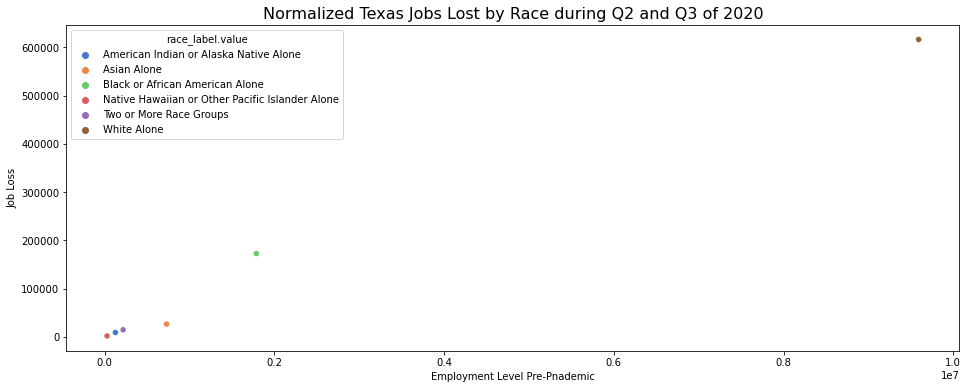

In [151]:
# Plot of the above by race, Emp, and Job loss:
plt.figure(figsize=(16,6))
sns.scatterplot(x="Emp", y='q1_minus_q3', hue=r_comp.index,
                palette="muted",
                data=r_comp, alpha=1)
plt.title('Normalized Texas Jobs Lost by Race during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Employment Level Pre-Pandemic')
plt.ylabel('Job Loss')
plt.show()

In [111]:
r_comp.Emp.sum()

12484537.0

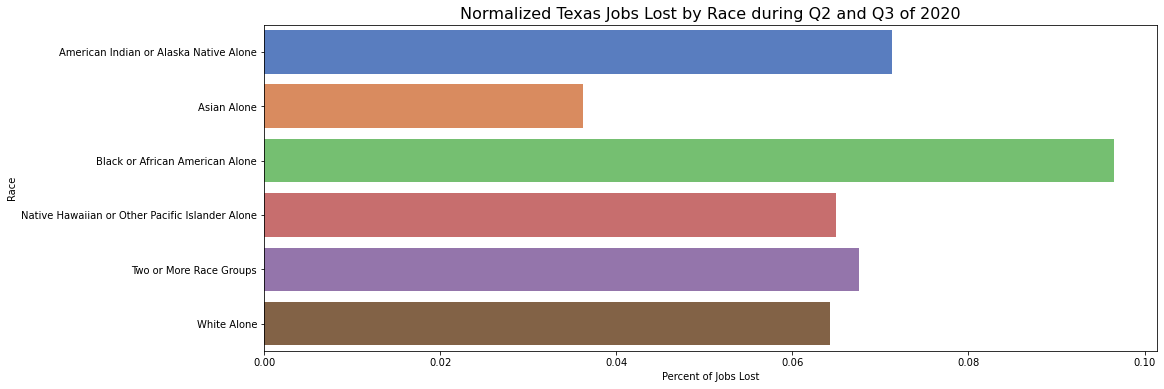

In [112]:
# Plot of the above by race:
plt.figure(figsize=(16,6))
sns.barplot(x="norm", y=r_comp.index,
                palette="muted",
                data=r_comp, alpha=1)
plt.title('Normalized Texas Jobs Lost by Race during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Percent of Jobs Lost')
plt.ylabel('Race')
plt.show()

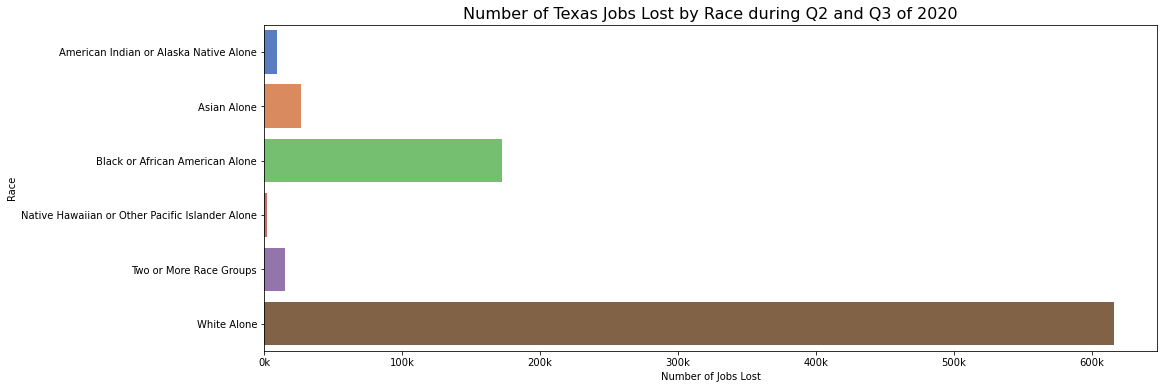

In [113]:
# Plot of the above by race:
plt.figure(figsize=(16,6))
sns.barplot(x="q1_minus_q3", y=r_comp.index,
                palette="muted",
                data=r_comp, alpha=1)
plt.title('Number of Texas Jobs Lost by Race during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Race')
plt.gca().xaxis.set_major_formatter(lambda x, pos: '{:.0f}k'.format(x / 1_000))
plt.show()

#### Ethnicity

In [114]:
e_comp = r_compare[['ethnicity_label.value', 'Emp', 'q1_minus_q3']].groupby('ethnicity_label.value').sum()
e_comp['norm'] = e_comp.q1_minus_q3 / e_comp.Emp 
e_comp

,Emp,q1_minus_q3,norm
ethnicity_label.value,,,
Hispanic or Latino,4217030.0,312129.0,0.074016
Not Hispanic or Latino,8267507.0,529152.0,0.064004


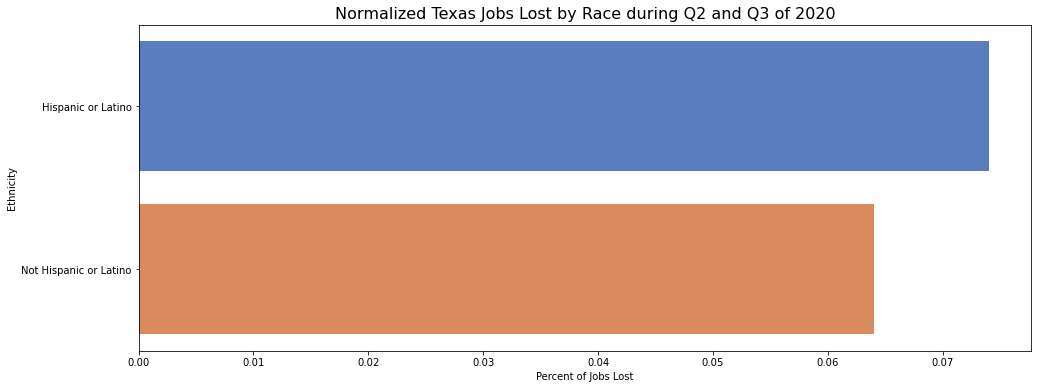

In [115]:
# Plot of the above by race:
plt.figure(figsize=(16,6))
sns.barplot(x="norm", y=e_comp.index,
                palette="muted",
                data=e_comp, alpha=1)
plt.title('Normalized Texas Jobs Lost by Race during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Percent of Jobs Lost')
plt.ylabel('Ethnicity')
plt.show()

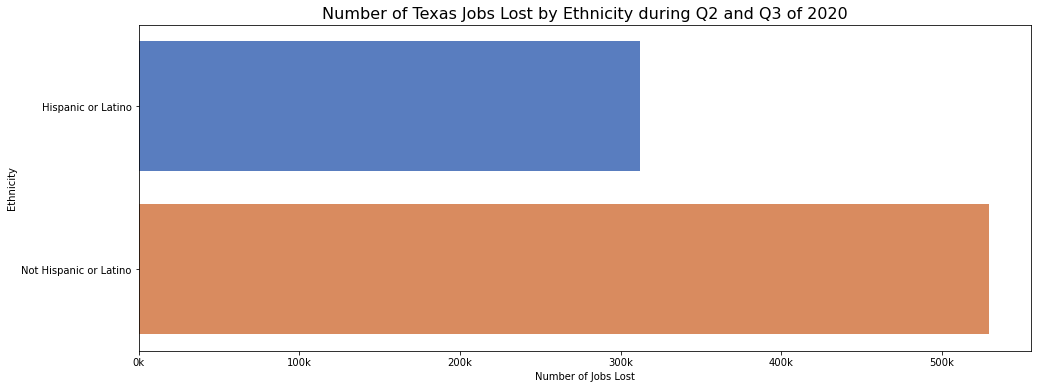

In [116]:
# Plot of the above by race:
plt.figure(figsize=(16,6))
sns.barplot(x="q1_minus_q3", y=e_comp.index,
                palette="muted",
                data=e_comp, alpha=1)
plt.title('Number of Texas Jobs Lost by Ethnicity during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Ethnicity')
plt.gca().xaxis.set_major_formatter(lambda x, pos: '{:.0f}k'.format(x / 1_000))
plt.show()

### Education

In [117]:
ed_compare.head()

,index,industry,industry_name,sex,sex_label.value,education,education_label.value,year,quarter,Emp,Sep,date,q3_Emp,q1_minus_q3,normalized
0,15680,111,Crop Production,1,Male,E1,Less than high school,2020,1,4928.0,788.0,2020-01-01,4855.0,73.0,0.014813
1,15681,111,Crop Production,1,Male,E2,"High school or equivalent, no college",2020,1,3071.0,579.0,2020-01-01,3051.0,20.0,0.006513
2,15682,111,Crop Production,1,Male,E3,Some college or Associate degree,2020,1,2587.0,508.0,2020-01-01,2577.0,10.0,0.003865
3,15683,111,Crop Production,1,Male,E4,Bachelor's degree or advanced degree,2020,1,1415.0,259.0,2020-01-01,1441.0,-26.0,-0.018375
4,15684,111,Crop Production,1,Male,E5,Educational attainment not available (workers ...,2020,1,1378.0,662.0,2020-01-01,1681.0,-303.0,-0.219884


In [118]:
ed_comp = ed_compare[['education_label.value', 'Emp', 'q1_minus_q3']].groupby('education_label.value').sum()

In [119]:
ed_comp['norm'] = ed_comp.q1_minus_q3 / ed_comp.Emp

In [120]:
ed_comp

,Emp,q1_minus_q3,norm
education_label.value,,,
Bachelor's degree or advanced degree,2590795.0,128446.0,0.049578
Educational attainment not available (workers aged 24 or younger),1559457.0,141403.0,0.090675
"High school or equivalent, no college",2848304.0,197944.0,0.069495
Less than high school,2136665.0,159413.0,0.074608
Some college or Associate degree,3349345.0,214080.0,0.063917


In [121]:
ed_comp.Emp.sum()

12484566.0

In [122]:
ed_comp.q1_minus_q3.sum()

841286.0

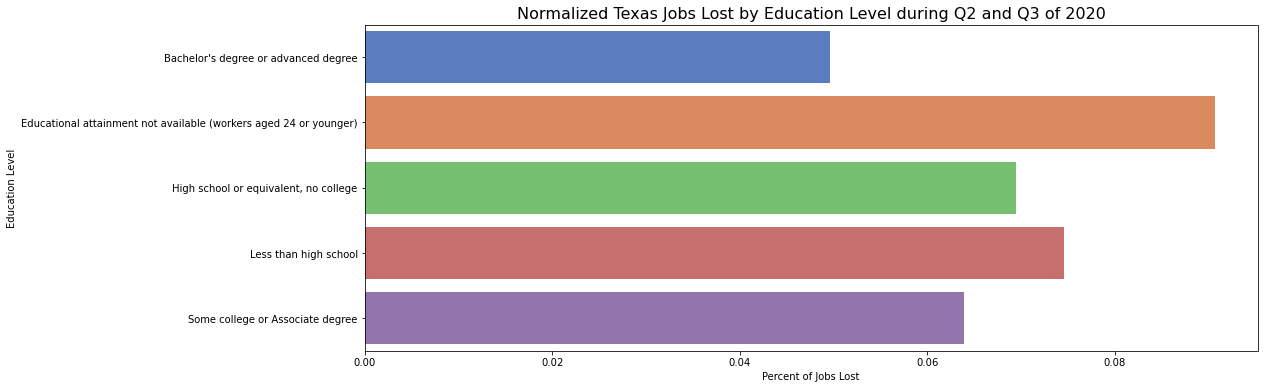

In [123]:
# Plot of the above by ethnicity:
plt.figure(figsize=(16,6))
sns.barplot(x="norm", y=ed_comp.index,
                palette="muted",
                data=ed_comp, alpha=1)
plt.title('Normalized Texas Jobs Lost by Education Level during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Percent of Jobs Lost')
plt.ylabel('Education Level')
plt.show()

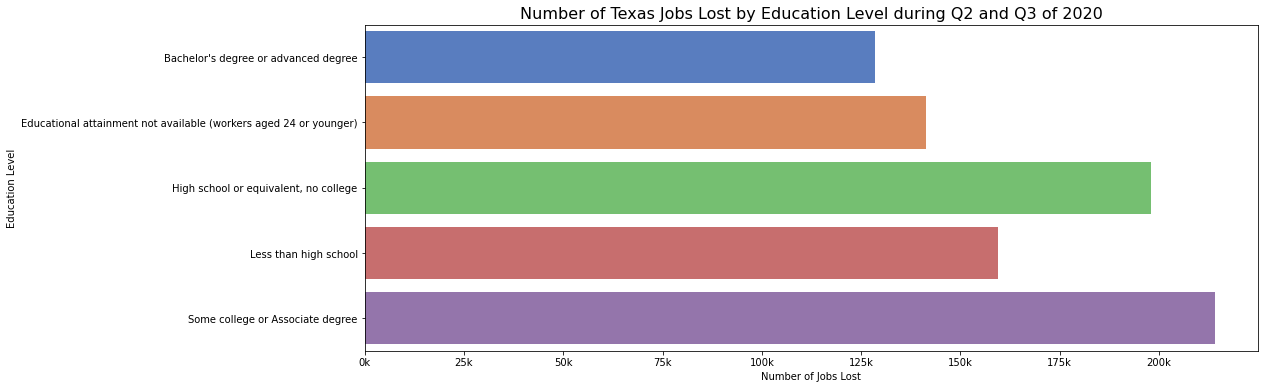

In [124]:
# Plot of the above by race:
plt.figure(figsize=(16,6))
sns.barplot(x="q1_minus_q3", y=ed_comp.index,
                palette="muted",
                data=ed_comp, alpha=1)
plt.title('Number of Texas Jobs Lost by Education Level during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Education Level')
plt.gca().xaxis.set_major_formatter(lambda x, pos: '{:.0f}k'.format(x / 1_000))
plt.show()

### Gender

In [125]:
mf_comp = age_compare[['sex_label.value', 'Emp', 'q1_minus_q3']].groupby('sex_label.value').sum()
mf_comp['norm'] = mf_comp.q1_minus_q3 / mf_comp.Emp 
mf_comp

,Emp,q1_minus_q3,norm
sex_label.value,,,
Female,6146507.0,453180.0,0.073730
Male,6338037.0,388093.0,0.061232


### Age

In [126]:
age_compare

,index,industry,industry_name,sex,sex_label.value,agegrp_label.value,year,quarter,Emp,Sep,date,q3_Emp,q1_minus_q3,normalized
0,25088,111,Crop Production,1,Male,14-18,2020,1,290.0,139.0,2020-01-01,484.0,-194.0,-0.668966
1,25089,111,Crop Production,1,Male,19-21,2020,1,510.0,294.0,2020-01-01,591.0,-81.0,-0.158824
2,25090,111,Crop Production,1,Male,22-24,2020,1,578.0,229.0,2020-01-01,605.0,-27.0,-0.046713
3,25091,111,Crop Production,1,Male,25-34,2020,1,2188.0,571.0,2020-01-01,2184.0,4.0,0.001828
4,25092,111,Crop Production,1,Male,35-44,2020,1,2268.0,467.0,2020-01-01,2280.0,-12.0,-0.005291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,26651,928,National Security and International Affairs,2,Female,25-34,2020,1,26.0,6.0,2020-01-01,66.0,-40.0,-1.538462
1564,26652,928,National Security and International Affairs,2,Female,35-44,2020,1,41.0,9.0,2020-01-01,71.0,-30.0,-0.731707
1565,26653,928,National Security and International Affairs,2,Female,45-54,2020,1,48.0,14.0,2020-01-01,68.0,-20.0,-0.416667
1566,26654,928,National Security and International Affairs,2,Female,55-64,2020,1,47.0,18.0,2020-01-01,52.0,-5.0,-0.106383


In [127]:
age_compare.Emp.sum()

12484544.0

In [128]:
age_comp = age_compare[['agegrp_label.value', 'Emp', 'q1_minus_q3']].groupby('agegrp_label.value').sum()
age_comp['norm'] = age_comp.q1_minus_q3 / age_comp.Emp 
age_comp

,Emp,q1_minus_q3,norm
agegrp_label.value,,,
14-18,260678.0,6415.0,0.024609
19-21,581600.0,53297.0,0.091639
22-24,717179.0,81697.0,0.113914
25-34,2797338.0,235147.0,0.084061
35-44,2836591.0,164025.0,0.057825
45-54,2523303.0,127359.0,0.050473
55-64,1973700.0,106950.0,0.054188
65-99,794155.0,66383.0,0.083589


In [154]:
age_comp[:4].q1_minus_q3.sum()

376556.0

In [156]:
age_comp[4:].q1_minus_q3.sum()

464717.0

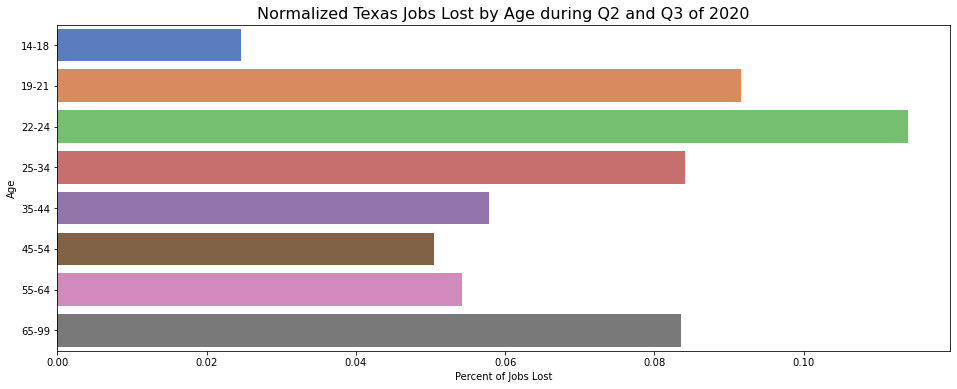

In [129]:
# Plot of the above by ethnicity:
plt.figure(figsize=(16,6))
sns.barplot(x="norm", y=age_comp.index,
                palette="muted",
                data=age_comp, alpha=1)
plt.title('Normalized Texas Jobs Lost by Age during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Percent of Jobs Lost')
plt.ylabel('Age')
plt.show()

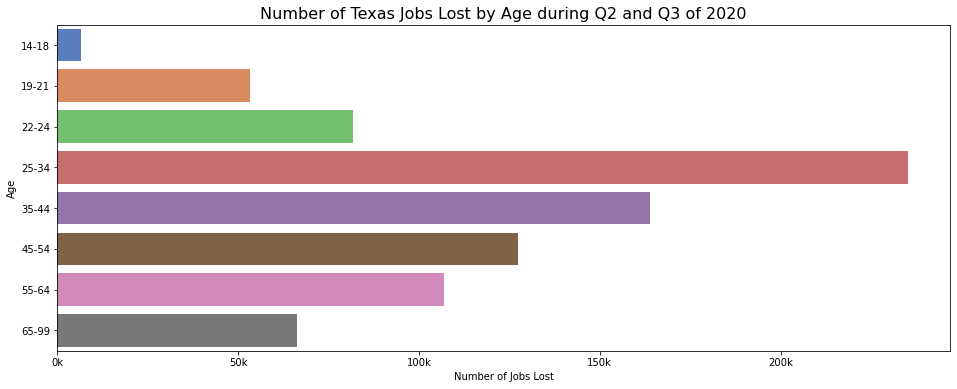

In [130]:
# Plot of the above by race:
plt.figure(figsize=(16,6))
sns.barplot(x="q1_minus_q3", y=age_comp.index,
                palette="muted",
                data=age_comp, alpha=1)
plt.title('Number of Texas Jobs Lost by Age during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Age')
plt.gca().xaxis.set_major_formatter(lambda x, pos: '{:.0f}k'.format(x / 1_000))
plt.show()

#### Exports:

In [131]:
r_comp.to_csv('race_agg.csv')
e_comp.to_csv('ethnicity_agg.csv')
ed_comp.to_csv('education_agg.csv')
age_comp.to_csv('age_agg.csv')
mf_comp.to_csv('gender_agg.csv')

## Demographics by Cluster

In [132]:
df_new = census_light.iloc[:0,:].copy()
df_new

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date,year


In [133]:
def select_industries(df, industry_list):
    '''Function will take in a dataframe and return the datafram with only the select industries'''
    df_new = df.iloc[:0,:].copy()
    for ind in industry_list:
        df_new = df_new.append(df[df.industry == ind], ignore_index=True)
    return df_new
        

### Industries that were Most Affected Negatively 
- 711:	Performing Arts, Spectator Sports, and Related Indust
- 453:	Miscellaneous Store Retailers
- 451:	Sporting Goods, Hobby, Musical Instrument, and Book Stores
- 721:	Accommodation
- 722:	Food Services and Drinking Places
- 512:	Motion Picture and Sound Recording Industries
- 812:	Personal and Laundry Services
- 442:	Furniture and Home Furnishings Stores
- 316:	Leather and Allied Product Manufacturing
- 713:	Amusement, Gambling, and Recreation Industries
- 487:	Scenic and Sightseeing Transportation
- 448:	Clothing and Clothing Accessories Stores

In [134]:
negatively_affected_industries = [711, 453, 451, 721, 722, 512, 812, 442, 316, 713, 487, 448]

In [135]:
test = select_industries(census_light, negatively_affected_industries)
test

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date,year
0,711,"Performing Arts, Spectator Sports, and Related...",1,29111,9381.0,4465.0,0.150,2017-01-01,2017
1,711,"Performing Arts, Spectator Sports, and Related...",2,30169,11277.0,5751.0,0.184,2017-04-01,2017
2,711,"Performing Arts, Spectator Sports, and Related...",3,32496,9414.0,6198.0,0.194,2017-07-01,2017
3,711,"Performing Arts, Spectator Sports, and Related...",4,31290,11752.0,6129.0,0.198,2017-10-01,2017
4,711,"Performing Arts, Spectator Sports, and Related...",1,30491,9623.0,4256.0,0.137,2018-01-01,2018
...,...,...,...,...,...,...,...,...,...
199,448,Clothing and Clothing Accessories Stores,1,128745,47355.0,39002.0,0.337,2020-01-01,2020
200,448,Clothing and Clothing Accessories Stores,2,103124,23217.0,21035.0,0.218,2020-04-01,2020
201,448,Clothing and Clothing Accessories Stores,3,89981,25788.0,16506.0,0.178,2020-07-01,2020
202,448,Clothing and Clothing Accessories Stores,4,95690,37978.0,20142.0,0.198,2020-10-01,2020


#### Age

In [136]:
age_negaff_ind = select_industries(age_compare, negatively_affected_industries)
age_negaff_ind

,index,industry,industry_name,sex,sex_label.value,agegrp_label.value,year,quarter,Emp,Sep,date,q3_Emp,q1_minus_q3,normalized
0,26400,711,"Performing Arts, Spectator Sports, and Related...",1,Male,14-18,2020,1,321.0,347.0,2020-01-01,145.0,176.0,0.548287
1,26401,711,"Performing Arts, Spectator Sports, and Related...",1,Male,19-21,2020,1,792.0,818.0,2020-01-01,305.0,487.0,0.614899
2,26402,711,"Performing Arts, Spectator Sports, and Related...",1,Male,22-24,2020,1,1440.0,980.0,2020-01-01,700.0,740.0,0.513889
3,26403,711,"Performing Arts, Spectator Sports, and Related...",1,Male,25-34,2020,1,5087.0,3012.0,2020-01-01,3028.0,2059.0,0.404757
4,26404,711,"Performing Arts, Spectator Sports, and Related...",1,Male,35-44,2020,1,3957.0,2397.0,2020-01-01,2293.0,1664.0,0.420521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,25787,448,Clothing and Clothing Accessories Stores,2,Female,25-34,2020,1,19267.0,6274.0,2020-01-01,14086.0,5181.0,0.268905
188,25788,448,Clothing and Clothing Accessories Stores,2,Female,35-44,2020,1,12396.0,3473.0,2020-01-01,9356.0,3040.0,0.245240
189,25789,448,Clothing and Clothing Accessories Stores,2,Female,45-54,2020,1,10555.0,2666.0,2020-01-01,7995.0,2560.0,0.242539
190,25790,448,Clothing and Clothing Accessories Stores,2,Female,55-64,2020,1,7820.0,1871.0,2020-01-01,5990.0,1830.0,0.234015


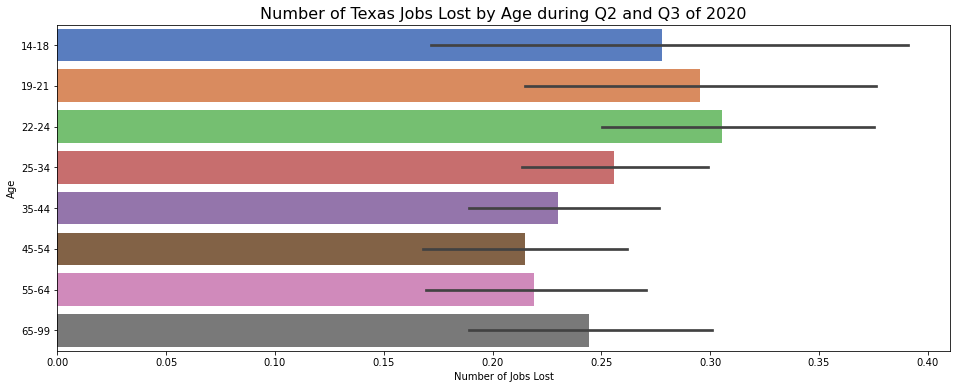

In [137]:

plt.figure(figsize=(16,6))
sns.barplot(x="normalized", y='agegrp_label.value',
                palette="muted",
                data=age_negaff_ind, alpha=1)
plt.title('Number of Texas Jobs Lost by Age during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Age')
#plt.gca().xaxis.set_major_formatter(lambda x, pos: '{:.0f}k'.format(x / 1_000))
plt.show()

In [138]:
age_negaff_ind.to_csv('age_neg_aff_ind.csv')

#### Education Level

In [139]:
ed_negaff_ind = select_industries(ed_compare, negatively_affected_industries)
ed_negaff_ind

,index,industry,industry_name,sex,sex_label.value,education,education_label.value,year,quarter,Emp,Sep,date,q3_Emp,q1_minus_q3,normalized
0,16500,711,"Performing Arts, Spectator Sports, and Related...",1,Male,E1,Less than high school,2020,1,2728.0,1767.0,2020-01-01,1543.0,1185.0,0.434384
1,16501,711,"Performing Arts, Spectator Sports, and Related...",1,Male,E2,"High school or equivalent, no college",2020,1,4311.0,2817.0,2020-01-01,2323.0,1988.0,0.461146
2,16502,711,"Performing Arts, Spectator Sports, and Related...",1,Male,E3,Some college or Associate degree,2020,1,5273.0,3395.0,2020-01-01,2815.0,2458.0,0.466148
3,16503,711,"Performing Arts, Spectator Sports, and Related...",1,Male,E4,Bachelor's degree or advanced degree,2020,1,4401.0,2260.0,2020-01-01,2651.0,1750.0,0.397637
4,16504,711,"Performing Arts, Spectator Sports, and Related...",1,Male,E5,Educational attainment not available (workers ...,2020,1,2553.0,2144.0,2020-01-01,1149.0,1404.0,0.549941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,16115,448,Clothing and Clothing Accessories Stores,2,Female,E1,Less than high school,2020,1,12269.0,3431.0,2020-01-01,9231.0,3038.0,0.247616
116,16116,448,Clothing and Clothing Accessories Stores,2,Female,E2,"High school or equivalent, no college",2020,1,14974.0,4247.0,2020-01-01,11159.0,3815.0,0.254775
117,16117,448,Clothing and Clothing Accessories Stores,2,Female,E3,Some college or Associate degree,2020,1,16638.0,4882.0,2020-01-01,12240.0,4398.0,0.264335
118,16118,448,Clothing and Clothing Accessories Stores,2,Female,E4,Bachelor's degree or advanced degree,2020,1,10210.0,2926.0,2020-01-01,7565.0,2645.0,0.259060


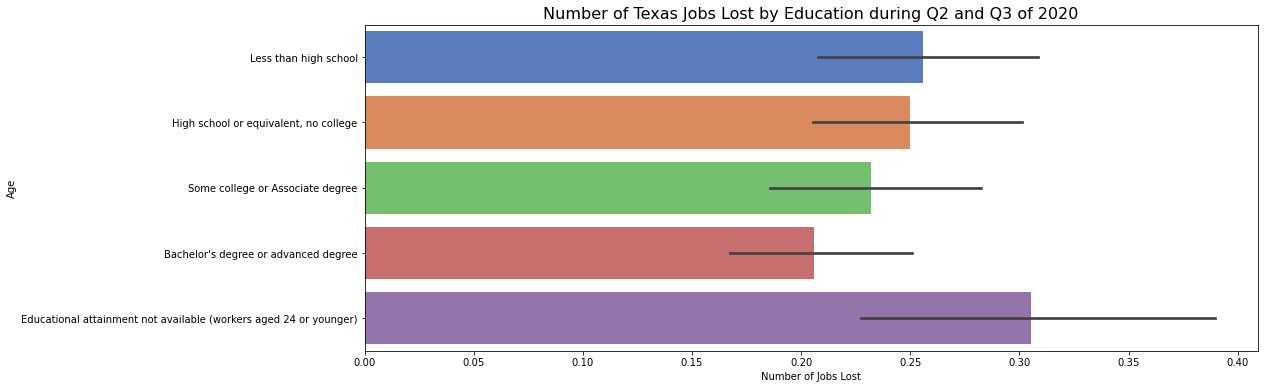

In [140]:
plt.figure(figsize=(16,6))
sns.barplot(x="normalized", y='education_label.value',
                palette="muted",
                data=ed_negaff_ind, alpha=1)
plt.title('Number of Texas Jobs Lost by Education during Q2 and Q3 of 2020', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Age')
#plt.gca().xaxis.set_major_formatter(lambda x, pos: '{:.0f}k'.format(x / 1_000))
plt.show()

In [141]:
ed_negaff_ind.to_csv('ed_negaff_ind.csv')

#### Race/Ethnicity

In [142]:
race_negaff_ind = select_industries(r_compare, negatively_affected_industries)
race_negaff_ind

,index,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date,sep_div_emp,q3_Emp,q1_minus_q3,q2q3_sep_sum,normalized
0,19800,711,"Performing Arts, Spectator Sports, and Related...",0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2020,1,19414.0,10932.0,2020-01-01,0.563099,11290.0,8124.0,7050.0,0.418461
1,19801,711,"Performing Arts, Spectator Sports, and Related...",0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2020,1,7393.0,5452.0,2020-01-01,0.737454,3589.0,3804.0,2839.0,0.514541
2,19802,711,"Performing Arts, Spectator Sports, and Related...",0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2020,1,4713.0,3553.0,2020-01-01,0.753872,1736.0,2977.0,2209.0,0.631657
3,19803,711,"Performing Arts, Spectator Sports, and Related...",0,All Sexes,A2,Black or African American Alone,A2,Hispanic or Latino,2020,1,220.0,163.0,2020-01-01,0.740909,114.0,106.0,96.0,0.481818
4,19804,711,"Performing Arts, Spectator Sports, and Related...",0,All Sexes,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,2020,1,124.0,85.0,2020-01-01,0.685484,63.0,61.0,45.0,0.491935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,19339,448,Clothing and Clothing Accessories Stores,0,All Sexes,A4,Asian Alone,A2,Hispanic or Latino,2020,1,384.0,129.0,2020-01-01,0.335938,263.0,121.0,150.0,0.315104
140,19340,448,Clothing and Clothing Accessories Stores,0,All Sexes,A5,Native Hawaiian or Other Pacific Islander Alone,A1,Not Hispanic or Latino,2020,1,166.0,61.0,2020-01-01,0.367470,113.0,53.0,68.0,0.319277
141,19341,448,Clothing and Clothing Accessories Stores,0,All Sexes,A5,Native Hawaiian or Other Pacific Islander Alone,A2,Hispanic or Latino,2020,1,128.0,54.0,2020-01-01,0.421875,85.0,43.0,45.0,0.335938
142,19342,448,Clothing and Clothing Accessories Stores,0,All Sexes,A7,Two or More Race Groups,A1,Not Hispanic or Latino,2020,1,1850.0,740.0,2020-01-01,0.400000,1279.0,571.0,809.0,0.308649


In [143]:
race_negaff_ind.to_csv('race_negaff_ind.csv')

### Industries that were Positively Affected
- 445:	Food and Beverage Stores
- 511:	Publishing Industries (except Internet)
- 444:	Building Material and Garden Equipment and Supplies Dealers
- 482:	Rail Transportation
- 492:	Couriers and Messengers
- 454:	Nonstore Retailers
- 525:	Funds, Trusts, and Other Financial Vehicles
- 926:	Administration of Economic Programs

In [144]:
positively_affected_industries = [445, 511, 444, 482, 492, 454, 525, 926]

#### Age

In [145]:
age_posaff_ind = select_industries(age_compare, positively_affected_industries)
age_posaff_ind

,index,industry,industry_name,sex,sex_label.value,agegrp_label.value,year,quarter,Emp,Sep,date,q3_Emp,q1_minus_q3,normalized
0,25728,445,Food and Beverage Stores,1,Male,14-18,2020,1,8524.0,2399.0,2020-01-01,9134.0,-610.0,-0.071563
1,25729,445,Food and Beverage Stores,1,Male,19-21,2020,1,13244.0,3376.0,2020-01-01,14495.0,-1251.0,-0.094458
2,25730,445,Food and Beverage Stores,1,Male,22-24,2020,1,11018.0,2288.0,2020-01-01,12099.0,-1081.0,-0.098112
3,25731,445,Food and Beverage Stores,1,Male,25-34,2020,1,26467.0,4463.0,2020-01-01,27642.0,-1175.0,-0.044395
4,25732,445,Food and Beverage Stores,1,Male,35-44,2020,1,19807.0,2627.0,2020-01-01,20716.0,-909.0,-0.045893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,26635,926,Administration of Economic Programs,2,Female,25-34,2020,1,1045.0,68.0,2020-01-01,1052.0,-7.0,-0.006699
124,26636,926,Administration of Economic Programs,2,Female,35-44,2020,1,1452.0,67.0,2020-01-01,1464.0,-12.0,-0.008264
125,26637,926,Administration of Economic Programs,2,Female,45-54,2020,1,1482.0,72.0,2020-01-01,1480.0,2.0,0.001350
126,26638,926,Administration of Economic Programs,2,Female,55-64,2020,1,1210.0,84.0,2020-01-01,1168.0,42.0,0.034711


In [146]:
age_posaff_ind.to_csv('age_posaff_ind.csv')

#### Education Level

In [147]:
ed_posaff_ind = select_industries(ed_compare, positively_affected_industries)
ed_posaff_ind

,index,industry,industry_name,sex,sex_label.value,education,education_label.value,year,quarter,Emp,Sep,date,q3_Emp,q1_minus_q3,normalized
0,16080,445,Food and Beverage Stores,1,Male,E1,Less than high school,2020,1,21700.0,2837.0,2020-01-01,22164.0,-464.0,-0.021382
1,16081,445,Food and Beverage Stores,1,Male,E2,"High school or equivalent, no college",2020,1,26332.0,3410.0,2020-01-01,26995.0,-663.0,-0.025178
2,16082,445,Food and Beverage Stores,1,Male,E3,Some college or Associate degree,2020,1,25538.0,3346.0,2020-01-01,26347.0,-809.0,-0.031678
3,16083,445,Food and Beverage Stores,1,Male,E4,Bachelor's degree or advanced degree,2020,1,14459.0,2050.0,2020-01-01,15300.0,-841.0,-0.058164
4,16084,445,Food and Beverage Stores,1,Male,E5,Educational attainment not available (workers ...,2020,1,32787.0,8063.0,2020-01-01,35728.0,-2941.0,-0.089700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,16645,926,Administration of Economic Programs,2,Female,E1,Less than high school,2020,1,644.0,41.0,2020-01-01,650.0,-6.0,-0.009317
76,16646,926,Administration of Economic Programs,2,Female,E2,"High school or equivalent, no college",2020,1,1286.0,81.0,2020-01-01,1286.0,0.0,0.000000
77,16647,926,Administration of Economic Programs,2,Female,E3,Some college or Associate degree,2020,1,1973.0,117.0,2020-01-01,1962.0,11.0,0.005575
78,16648,926,Administration of Economic Programs,2,Female,E4,Bachelor's degree or advanced degree,2020,1,1608.0,105.0,2020-01-01,1580.0,28.0,0.017413


In [148]:
ed_posaff_ind.to_csv('ed_posaff_ind.csv')

#### Race/Ethnicity

In [149]:
race_posaff_ind = select_industries(r_compare, positively_affected_industries)
race_posaff_ind

,index,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date,sep_div_emp,q3_Emp,q1_minus_q3,q2q3_sep_sum,normalized
0,19296,445,Food and Beverage Stores,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2020,1,94255.0,16325.0,2020-01-01,0.173200,98949.0,-4694.0,38298.0,-0.049801
1,19297,445,Food and Beverage Stores,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2020,1,89975.0,12946.0,2020-01-01,0.143884,93301.0,-3326.0,29113.0,-0.036966
2,19298,445,Food and Beverage Stores,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2020,1,27519.0,6834.0,2020-01-01,0.248338,28238.0,-719.0,15182.0,-0.026127
3,19299,445,Food and Beverage Stores,0,All Sexes,A2,Black or African American Alone,A2,Hispanic or Latino,2020,1,2305.0,411.0,2020-01-01,0.178308,2464.0,-159.0,995.0,-0.068980
4,19300,445,Food and Beverage Stores,0,All Sexes,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,2020,1,814.0,172.0,2020-01-01,0.211302,850.0,-36.0,440.0,-0.044226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,19975,926,Administration of Economic Programs,0,All Sexes,A4,Asian Alone,A2,Hispanic or Latino,2020,1,25.0,3.0,2020-01-01,0.120000,24.0,1.0,NaN,0.040000
92,19976,926,Administration of Economic Programs,0,All Sexes,A5,Native Hawaiian or Other Pacific Islander Alone,A1,Not Hispanic or Latino,2020,1,9.0,NaN,2020-01-01,NaN,9.0,0.0,1.0,0.000000
93,19977,926,Administration of Economic Programs,0,All Sexes,A5,Native Hawaiian or Other Pacific Islander Alone,A2,Hispanic or Latino,2020,1,11.0,0.0,2020-01-01,0.000000,12.0,-1.0,1.0,-0.090909
94,19978,926,Administration of Economic Programs,0,All Sexes,A7,Two or More Race Groups,A1,Not Hispanic or Latino,2020,1,126.0,6.0,2020-01-01,0.047619,131.0,-5.0,23.0,-0.039683


In [150]:
race_posaff_ind.to_csv('race_posaff_ind.csv')